# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# For reading and working with data
import numpy as np
import pandas as pd

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For capitalizing strings in reports
import string

# For test for the independence of 2 categories
from scipy.stats import chi2_contingency

# For changing dates
import datetime

# For splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Data Overview

- Observations
- Sanity checks

In [3]:
# Load the CSV file
def csv_read(file):
    """ 
    Reads a CSV file sample to quickly determine the data types and then 
    load the full file quicker
    
    file: the name of the csv to load
    """
    # Read the first 20 rows
    df_sample = pd.read_csv(file, nrows=20)
    dt = {}
    # Determine the datatypes of the columns from the sample data
    for col, dtyp in zip(df_sample.columns, df_sample.dtypes):
        dt[col] = dtyp
        
    # Load the entire main file using the datatypes determined in the sample load
    df_final = pd.read_csv(file, dtype=dt)
    return df_final

# Call the csv_read function to load the file
df_Inn = csv_read('INNHotelsGroup.csv')

In [4]:
# Retrieve the first 5 rows
df_Inn.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# Retrieve the last 5 rows
df_Inn.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


#### Observations:
* The arrival date is broken down into 3 columns (arrival_year, arrival_month, arrival_date)
* The booking date can be determined from arrival dates and lead time

In [6]:
# Show the number of rows and columns of the dataframe
print('There are', df_Inn.shape[0],'rows and', df_Inn.shape[1], 'columns')

There are 36275 rows and 19 columns


In [7]:
# List the column datatypes and check to see if there are any null values in the dataframe
df_Inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations:
* Booking_id, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of the type object
* No_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time,
  arrival_year_, arrival_mont, arrival_date, repeated_guest, no_of_previous_cancellations, 
  no_of_previous_bookings_not_canceled, no_of_special_requests are of the integer type
* Avg_price_per_room is a float data type
  

In [8]:
# Provide information on attributes
# Show name, number of missing values, unique value count, and unique value list if count less than 20
for i in df_Inn.columns:
    print('Attribute: {}'.format(i))
    print('Number of missing values: {}'.format(sum(df_Inn[i].isna())))
    print('Unique values: {}'.format(df_Inn[i].nunique()))
    if df_Inn[i].nunique() < 20:
        print('Value list:')
        df_unique=df_Inn[i].unique()
        print(np.sort(df_unique))
    else: 
        print('Too many unique values to print')
    print('---------------------------------------------------------')  

Attribute: Booking_ID
Number of missing values: 0
Unique values: 36275
Too many unique values to print
---------------------------------------------------------
Attribute: no_of_adults
Number of missing values: 0
Unique values: 5
Value list:
[0 1 2 3 4]
---------------------------------------------------------
Attribute: no_of_children
Number of missing values: 0
Unique values: 6
Value list:
[ 0  1  2  3  9 10]
---------------------------------------------------------
Attribute: no_of_weekend_nights
Number of missing values: 0
Unique values: 8
Value list:
[0 1 2 3 4 5 6 7]
---------------------------------------------------------
Attribute: no_of_week_nights
Number of missing values: 0
Unique values: 18
Value list:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
---------------------------------------------------------
Attribute: type_of_meal_plan
Number of missing values: 0
Unique values: 4
Value list:
['Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3' 'Not Selected']
----------------

#### Observations:
* There are no missing values in the dataset
* There are rows with 0 number of adults
* There are 3 types of meal plans and a 'Not Selected' value
* There are 7 different types of rooms
* The reservations are from 2017 and 2018
* There are 5 types of market segmentation
* There are rows with up to 13 previous cancellations

In [9]:
# Check the dataframe for any duplicate records
df_Inn.duplicated().sum()

0

#### Observations:
* There are no duplicate rows in the data

In [10]:
# Describe the numerical variables
df_Inn.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


#### Observations:
* The average number of guests for a reservation is 2 adults with no children. There are bookings with zero adults
* Most guests do not require a parking space
* The average lead time for a reservation is 85 days, while the mean lead time is 57 days indicating right skewness 
* Most customers are not repeat guests, thus most bookings would also have zero values for no_of_previous_cancellations
  and no_of_previous_bookings_not_canceled
* The average price per room has and average price of 103 and maximum price of 540. There appears to be rows with a zero price
* Most bookings do not have special requests

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Univariate Functions:

In [11]:
# Define function to create a histogram and box plot for an attribute
def hist_box_plots(df, col):
    """
    Create a histogram and bookplot of the column and dataframe provided
    
    df: dataframe
    col: dataframe column
    """
    
    # Create the plot figure
    plt.figure(figsize=(12,3))
    
    ################################################
    
    # Creating first subplot
    plt.subplot(1,2,1) 
    
    # Add title and labels
    plt.title(string.capwords(col.replace('_',' ')), fontsize=12, pad=20, loc='left')        
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    plt.ylabel('Record Count', fontsize=10, labelpad=10)
    
    # Set tick font sizes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Create a histogram of the attribute
    ax = sns.histplot(data = df, x=col, color='#CCECFF')
    
    # Hide the top and left spines of the histogram
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add a mean to the histogram
    ax.axvline(df[col].mean(), color='green', linestyle='--')
    
    # Add median to the histogram
    ax.axvline(df[col].median(), color='red', linestyle='-')
        
    ################################################    
    
    # Create second box plot next to first boxplot
    plt.subplot(1,2,2)
                
    # Set the flier type, color, and size of the outliers            
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
                
    # Add an x-axis label            
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5,)
                
    # Set the tick font size            
    plt.xticks(fontsize=10)
                
    # Create a boxplot of the attribute            
    ax = sns.boxplot(data = df, x=col, showmeans=True, flierprops=flierprops, color='#CCECFF')
                
    # Hide the top, right, and left spines            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)

In [12]:
# Define function to create a bar plot for an attribute and a possible column value for another attribute
def bar_plots(data, col, subset=None):
    """
    Create a bar plot of the column and dataframe provided
    
    data: dataframe
    col: dataframe column
    subset: a categorical value from a column
    """
    
    # For each value in the list of categories, create a bar chart
    
    # If there are less than 8 unique values in the attribute, set the size to 4 by 3
    # else set the size to 9 by 3 to show all values cleaner
    if data[col].nunique() < 8:
        plt.figure(figsize=(8,3))
    else: 
        plt.figure(figsize=(9,3))
    
    # Create the bar plot of the dataframe and all attributes individually
    # Order the each subplot by the x-axis data xtick names
    ax = sns.countplot(data=data,
                       x=col,
                       color='#CCECFF',
                       linewidth=.5, edgecolor='black',
                       order = data[col].value_counts().index.sort_values())
    
    # Add title and labels   
    if subset==None:
        plt.title(string.capwords(col.replace('_',' ')), fontsize=12, pad=10, loc='left')
    else:
        plt.title(string.capwords(col.replace('_',' '))+
                  ' and ' +subset, 
                  fontsize=12, pad=10, loc='left')   
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5,)
    plt.ylabel('Record Count', fontsize=10, labelpad=5)

    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    total = len(data[col])  # length of the column

    # Add percentage labels for each bar
    for p in ax.patches:
        label= '{:.1f}%'.format(p.get_height()/total*100) # include the bar value
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=8,
                xytext=(0, 5),
                textcoords="offset points",
                )  # annotate the percentage
    
    # Set the xtick parameters
    if data[col].nunique() < 20:
        plt.xticks(rotation=0, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=6)               
    plt.yticks(fontsize=8)
    
    # Tighten the layout of the subplots
    plt.tight_layout()    
    
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)

### Univariate Analysis

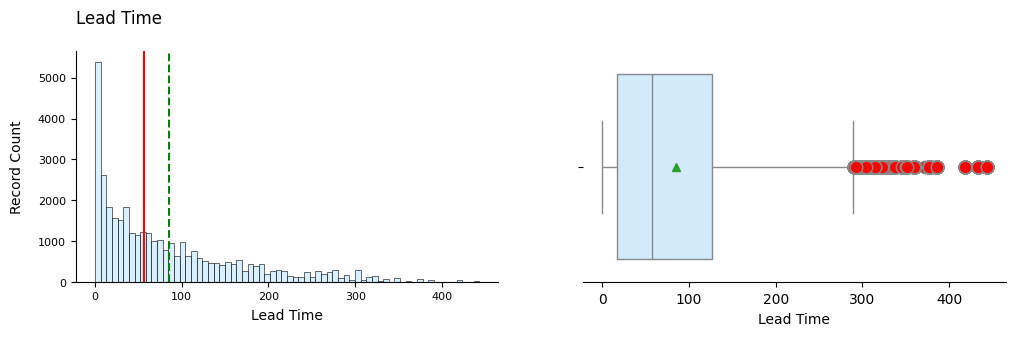

__________________________________________________________________________________________________________________________


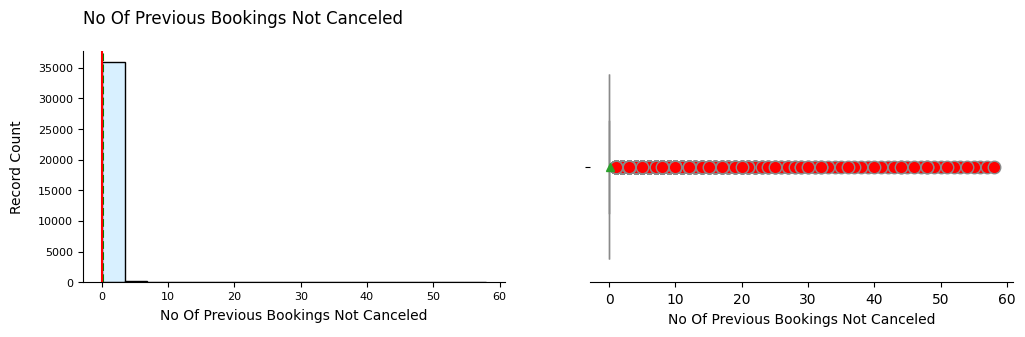

__________________________________________________________________________________________________________________________


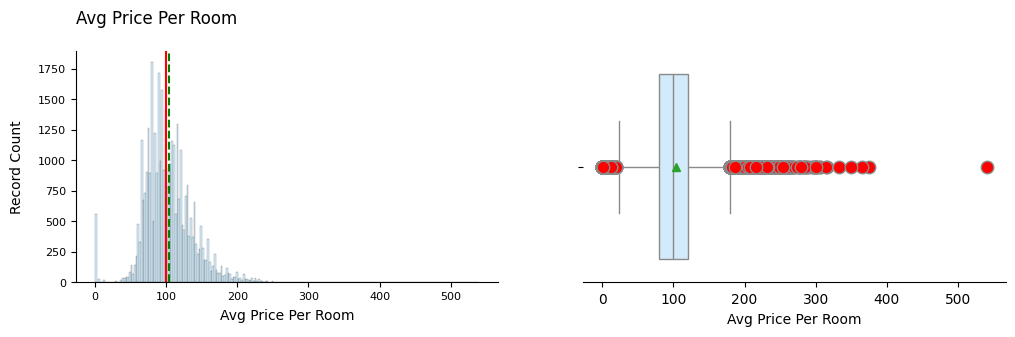

__________________________________________________________________________________________________________________________


In [13]:
# Create histograms and box plots for numerical attributes with many values 

# Create a list of the numerical attributes
df_num_list = [df_Inn.columns[x] for x in range(len(df_Inn.columns)) 
               if df_Inn.dtypes[x] in ('float64', 'int64')]

# Call the hist_box_plot function for each item in the list that has more than 31 values
# 31 was picked due to maximum calendar days in a month
for col in df_num_list:
    if df_Inn[col].nunique() >= 32:
        hist_box_plots(df_Inn, col)   

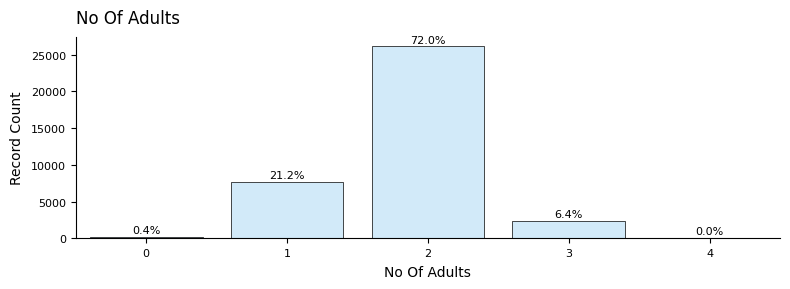

__________________________________________________________________________________________________________________________


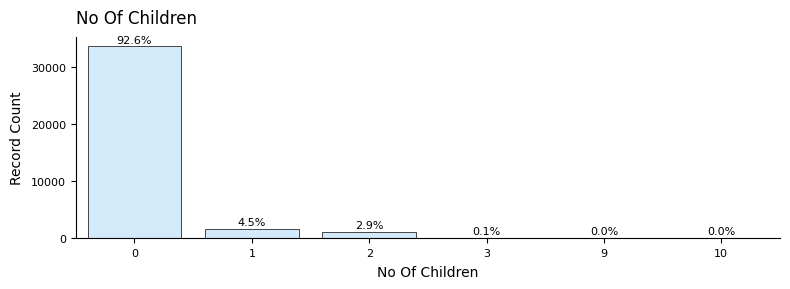

__________________________________________________________________________________________________________________________


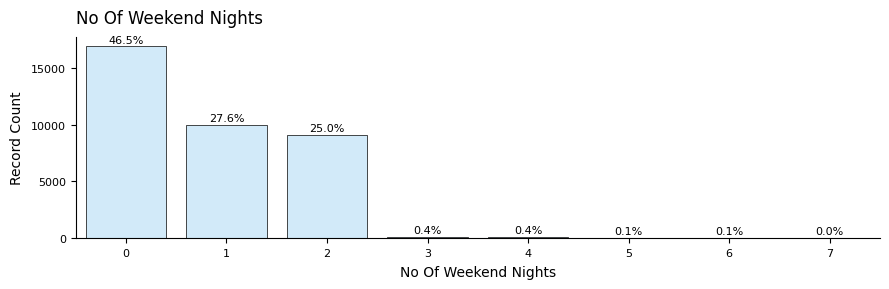

__________________________________________________________________________________________________________________________


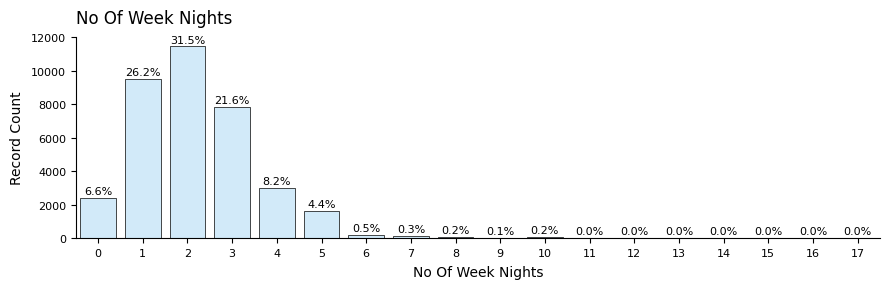

__________________________________________________________________________________________________________________________


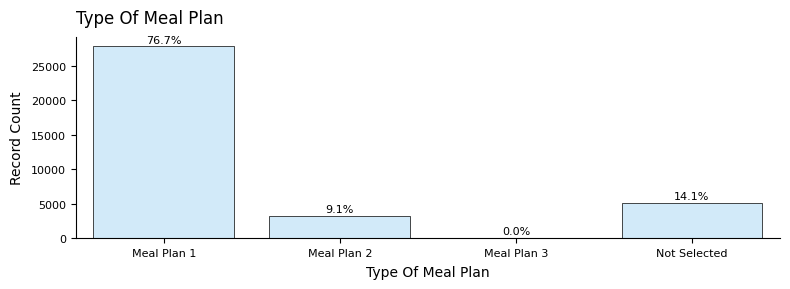

__________________________________________________________________________________________________________________________


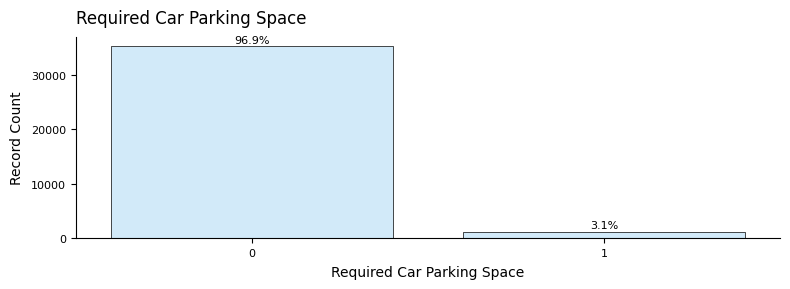

__________________________________________________________________________________________________________________________


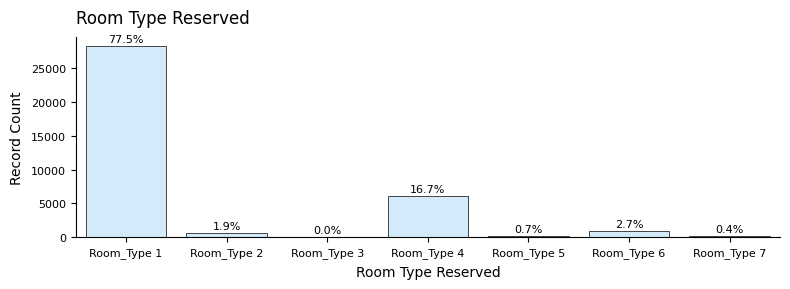

__________________________________________________________________________________________________________________________


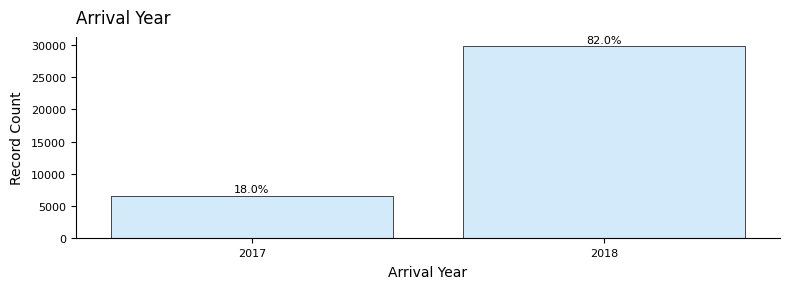

__________________________________________________________________________________________________________________________


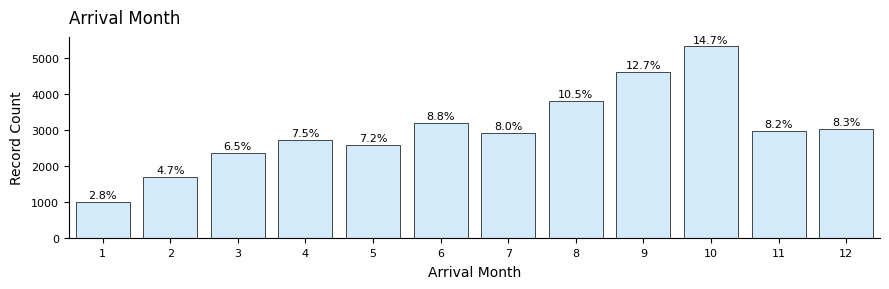

__________________________________________________________________________________________________________________________


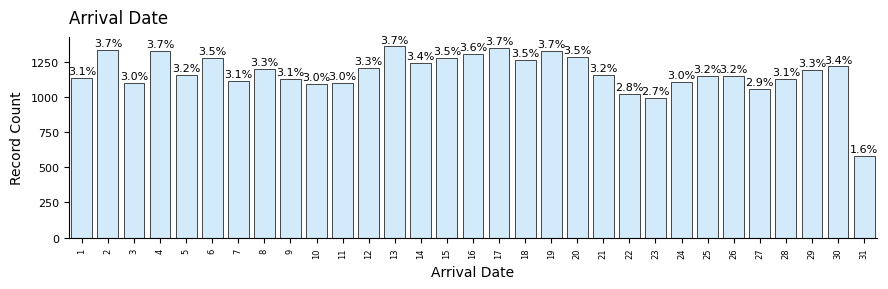

__________________________________________________________________________________________________________________________


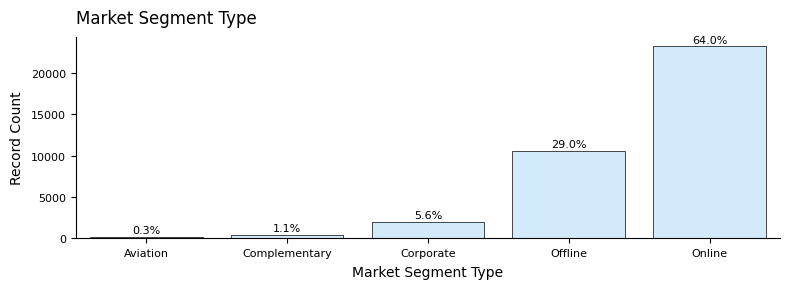

__________________________________________________________________________________________________________________________


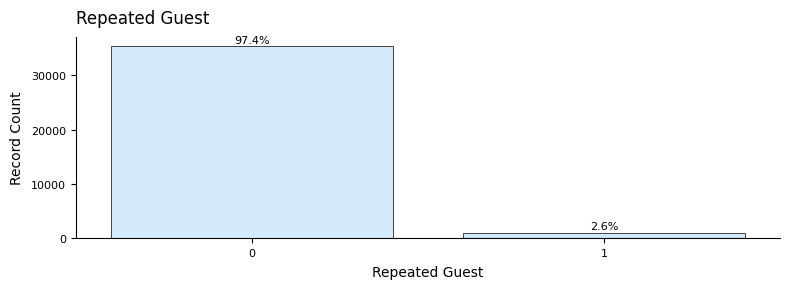

__________________________________________________________________________________________________________________________


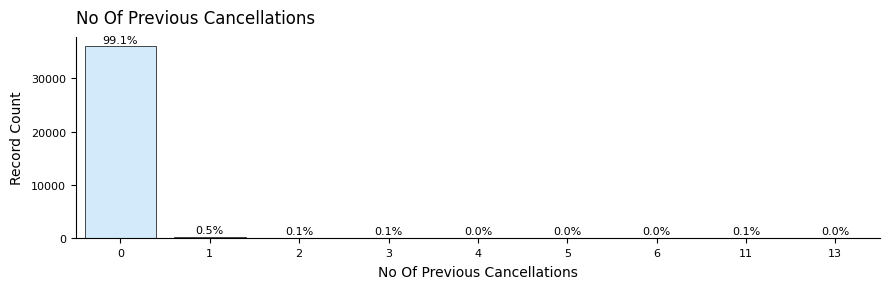

__________________________________________________________________________________________________________________________


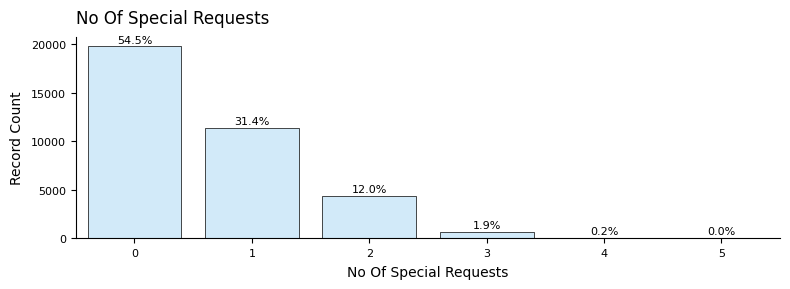

__________________________________________________________________________________________________________________________


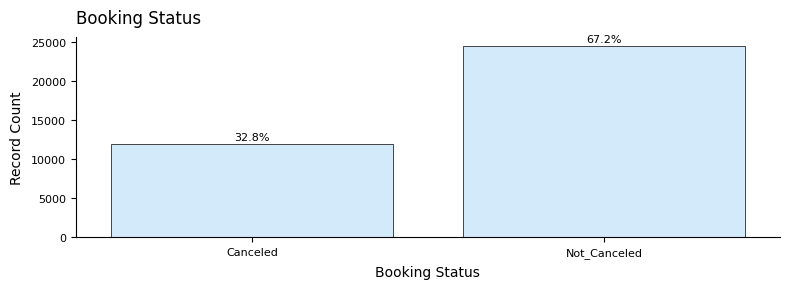

__________________________________________________________________________________________________________________________


In [14]:
# Create bar plots for other attributes
                  
# Create a list of the attributes
df_cat_list = df_Inn.columns.tolist()                

# Call the bar_plot function for each item in the list
for col in df_cat_list:
    if df_Inn[col].nunique() <= 32:
        bar_plots(df_Inn, col)   

#### Observations:
* Approximately 1/3 of bookings are cancelled
* 97% of bookings are made by new customers
* 99% of bookings did not have a previous cancellation
* Very few bookings are for repeat guests, had previous cancellations, or had previous bookings not cancelled
* 72% of bookings have 2 adults
* 93% of bookings have zero children
* Almost half of all bookings do not include a weekend night
* Almost 1/3 of bookings are for 2 weekday nights
* The average and median number of the average price per room is approxiately 100 Euros
* 77% of bookings include meal plan 1
* 97% of bookings do not require a car parking space 
* 78% of bookings are for room type 1
* 64% of bookings are made online
* 55% of bookings did not have any special requests, while 48% of bookings had 1 or 2 special requests
* The median lead time is 57 days and is highly right skewed
* 82% of bookings were made in 2018
* The busiest months are October, September, and August

### Bivariate Analysis

#### Bivariate functions

In [15]:
# Create a heatmap of the correlation of the numerical attributes
def heatmap_plt(data):
    
    # Create labels for the heatmap x and y labels
    labels = []
    for i in df_num_list:
        x = i.replace('_',' ').split()
        labels.append(' '.join(word[:].capitalize() for word in x))

    # Correlate the numerical attributes    
    df_corr = data[df_num_list].corr()

    plt.figure(figsize=(8,8))

    # Create the heatmap
    ax = sns.heatmap(df_corr, cbar=True, annot=True, vmin=-1, vmax=1, fmt=".2f",
                     xticklabels=labels,
                     yticklabels=labels,
                     cmap='Blues'
                    )

    # Add title
    plt.title('Heatmap: Numerical Attributes')

    # Show plot
    plt.show()

In [16]:
# Create density plot for one category and one numeric column
def distplot_by_cat_and_num_att (data, att, col):
    """
    Create bivariate box plots for one categorical attribute and one numerical attribute
    
    data: dataframe
    att: categorical attribute
    col: numerical attribute
    """
    # Create the plot figure
    plt.figure(figsize=(12,3))
    
    ################################################

    # Target must have 2 valuess
    target_uniq = data[att].unique()
    
    # Creating first density subplot
    plt.subplot(1,2,1)  
    plt.title("Distribution of target for target=" + string.capwords(target_uniq[0].replace('_',' ')))
    ax = sns.histplot(
            data=data[data[att] == target_uniq[0]],
            x=col,
            kde=True,
            color="teal",
            stat='density')

    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    #ax.set_xlabel('tset')#(string.capwords(target_uniq[0].replace('_',' ')), fontsize=10, labelpad=5)
    
    # Create second density subplot
    plt.subplot(1,2,2)
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    plt.title("Distribution of target for target=" + string.capwords(target_uniq[1].replace('_',' ')))
    sns.histplot(
        data=data[data[att] == target_uniq[1]],
        x=col,
        kde=True,
        color="orange",
        stat='density')

In [17]:
# Create bivariate box plot for one categorical attribute and one numerical attribute
# A subset categorical value of another attribute can be added
def boxplot_by_cat_and_num_att(data, att, col, subset=None):
    """
    Create bivariate box plots for one categorical attribute and one numerical attributes
    
    data: dataframe
    att: categorical attribute
    col: numerical column
    subset: a categorical value from a column
    """
    
    # Create the box plot figure
    plt.figure(figsize=(14,4))
    
    # Set the flier type, color, and size of the outliers 
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
    
    # Create a boxplot of the attribute  
    ax = sns.boxplot(data=data, x=att, y=col,
                     showmeans=True,
                     flierprops=flierprops,
                     color='#CCECFF',
                     order = data[att].value_counts().index.sort_values()
                     )
    
    # Add title and labels
    if subset==None:
        plt.title(string.capwords(col.replace('_',' '))+
                  ' by ' +string.capwords(att.replace('_',' ')), 
                  fontsize=12, pad=10)
    else:
        plt.title(string.capwords(col.replace('_',' '))+
                  ' by ' +string.capwords(att.replace('_',' '))+
                  ' and ' +subset, 
                  fontsize=12, pad=10)
    plt.xlabel(string.capwords(att.replace('_',' ')), fontsize=10, labelpad=5)
    plt.ylabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    
    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    if data[att].nunique() < 20:
        plt.xticks(rotation=0, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=8)               
    
    # Show the plot
    plt.show()

In [18]:
# Create bivariate box plot for one numerical attribute and one numerical attribute
def boxplot_by_num_and_num_att(data, att, col):
    """
    Create bivariate box plots for one categorical attribute and one numerical attributes
    
    data: dataframe
    att: numerical attribute
    col: numerical column
    subset: a categorical value from a column
    """
    
    # Create the box plot figure
    plt.figure(figsize=(14,4))
    
    # Set the flier type, color, and size of the outliers 
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
    
    # Create a boxplot of the attribute  
    ax = sns.boxplot(data=data, x=att, y=col,
                     showmeans=True,
                     flierprops=flierprops,
                     color='#CCECFF',
                     order = data[att].value_counts().index.sort_values()
                     )
    
    # Add title and labels

    plt.title(string.capwords(col.replace('_',' '))+
                  ' by ' +string.capwords(att.replace('_',' ')), 
                  fontsize=12, pad=10)
    plt.xlabel(string.capwords(att.replace('_',' ')), fontsize=10, labelpad=5)
    plt.ylabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    
    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    if data[att].nunique() < 20:
        plt.xticks(rotation=0, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=8)               
    
    # Show the plot
    plt.show()

In [19]:
# Define function to create a normalized stacked bar plot of an attribute against another column
def stacked_barplot(data, att, col):
    """
    Create bivariate box plots for one categorical attribute and one numerical attributes
    
    data: dataframe
    att: categorical attribute
    col: numerical column
    """    
    
    # Count the unique values in the col column
    count = data[col].nunique()
    
    # Return the first value in the sorted att column
    sorter = data[att].value_counts().index[-1]
    
    # Create a crosstab of the col and att columns
    tab1 = pd.crosstab(data[col], data[att], margins=True).sort_values(
        by=sorter, ascending=False)   
    
    tab1['Pct_Cancel']=round(tab1['Canceled']/tab1['All']*100,2)
    
    # Print the crosstab summary
    print('Crosstab of {} and {}'.format(string.capwords(att.replace('_',' ')), 
                                         string.capwords(col.replace('_',' '))))
    print('_'*80)
    print(tab1)
    
    ######################################################
    
    # Create the plot figure
    plt.figsize=(2,1)
    
    # Create a normalized crosstab of the col and att columns
    tab = pd.crosstab(data[col], data[att], normalize="index").sort_values(
        by=col, ascending=True)
    
    # Create a bar plot of the crosstab data
    ax = tab.plot(kind="bar", stacked=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False,)
    
    # Add title and labels
    plt.title('{} Against {}'.format(string.capwords(att.replace('_',' ')), 
                                     string.capwords(col.replace('_',' '))),
                                     fontsize=12, pad=10, loc='left')  
    labels = [string.capwords(item.get_text().replace('_',' ')) for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels)       
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=10)
 
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.show()

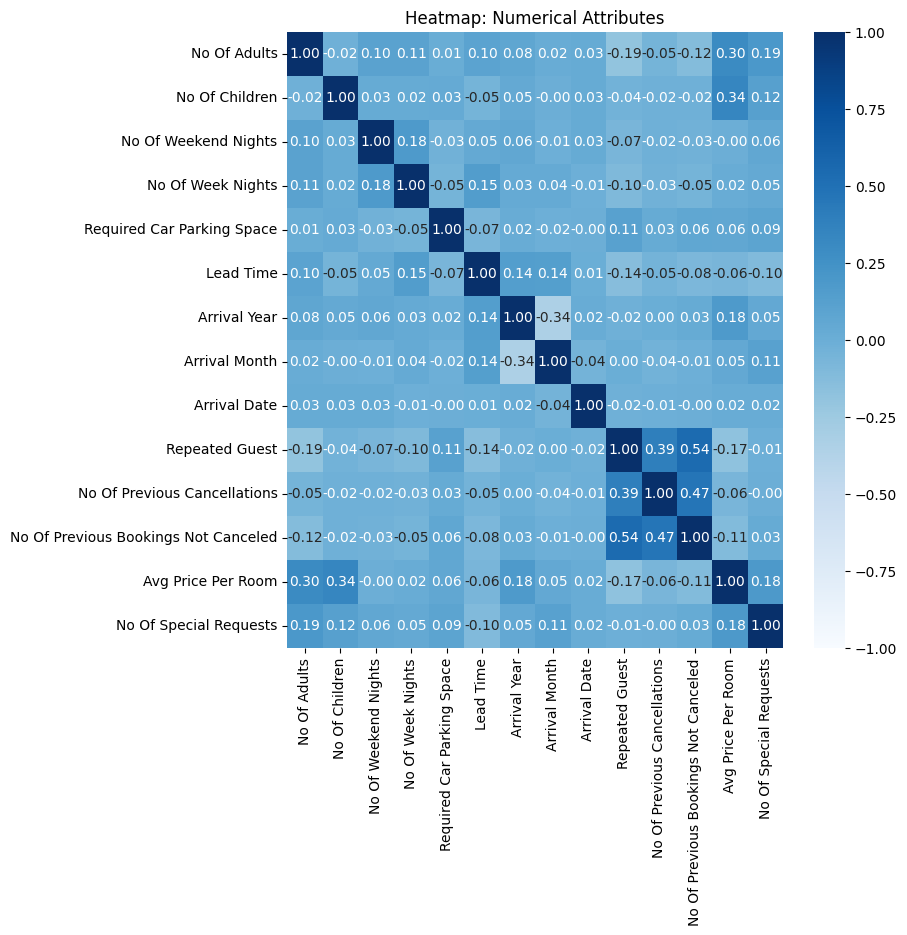

In [20]:
# Create a heatmap of the correlation of the numerical attributes
heatmap_plt(df_Inn)

#### Observations:
* There is a moderate correlation between no_of_previous_bookings_not_canceled and repeated_guest

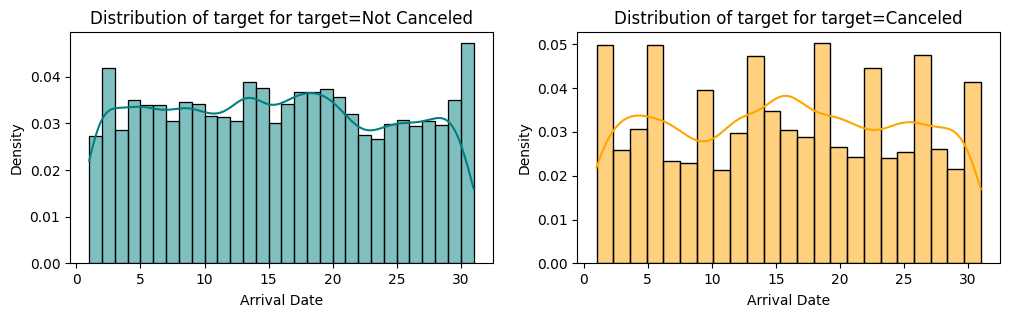

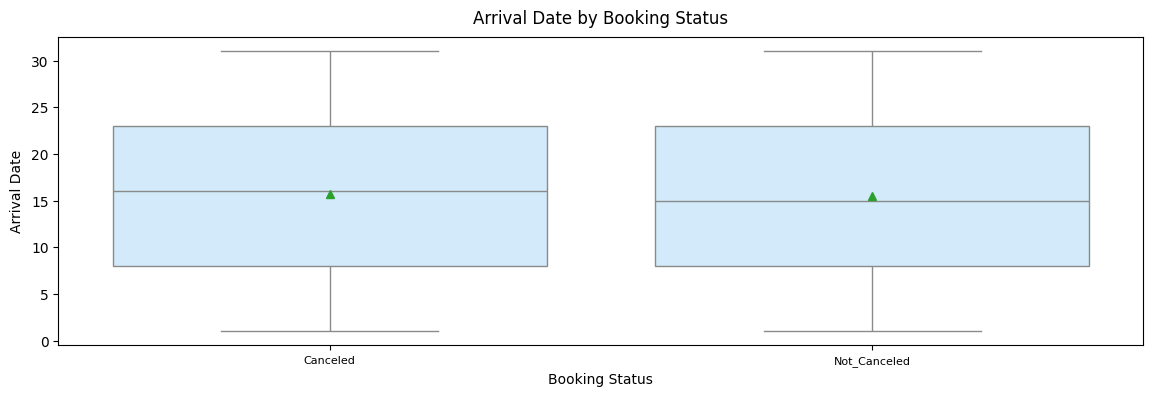

__________________________________________________________________________________________________________________________


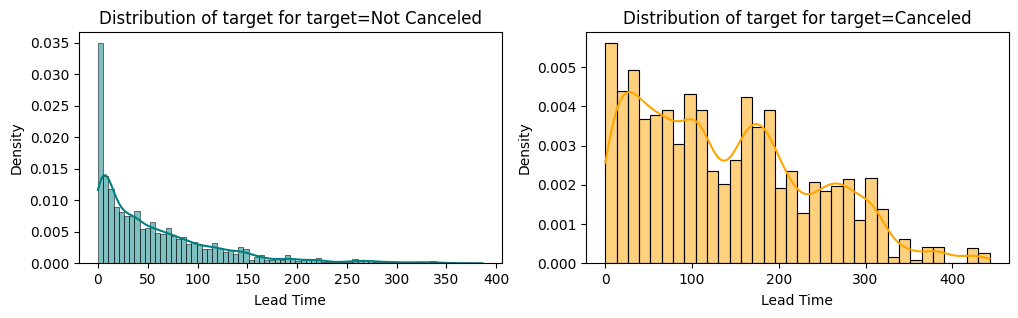

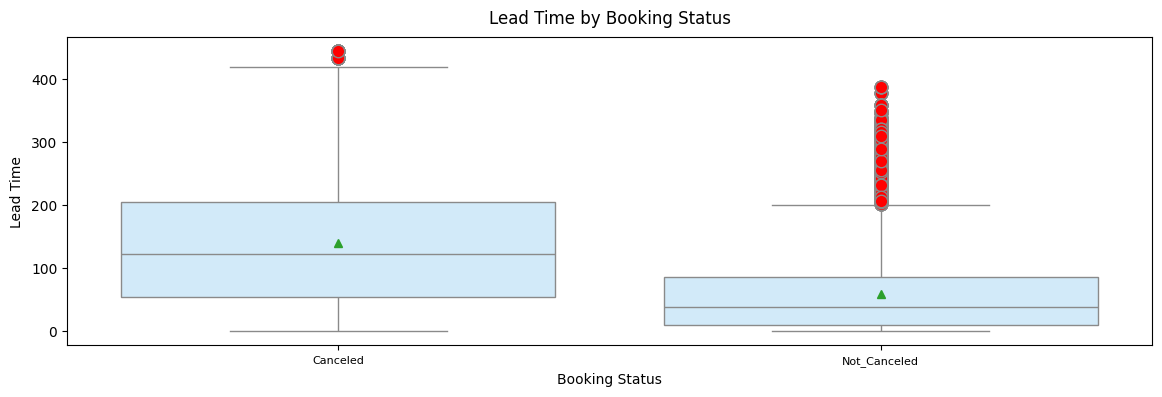

__________________________________________________________________________________________________________________________


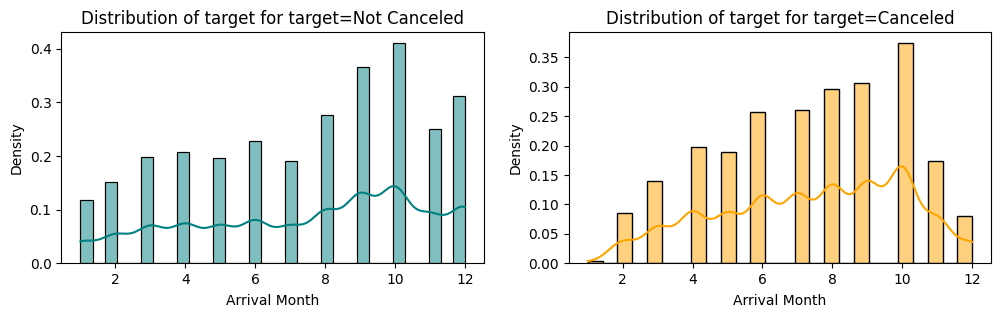

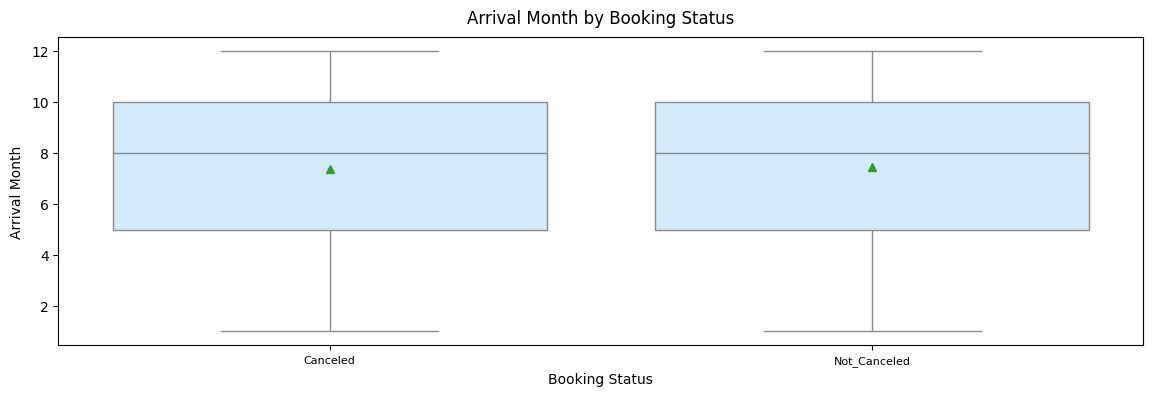

__________________________________________________________________________________________________________________________


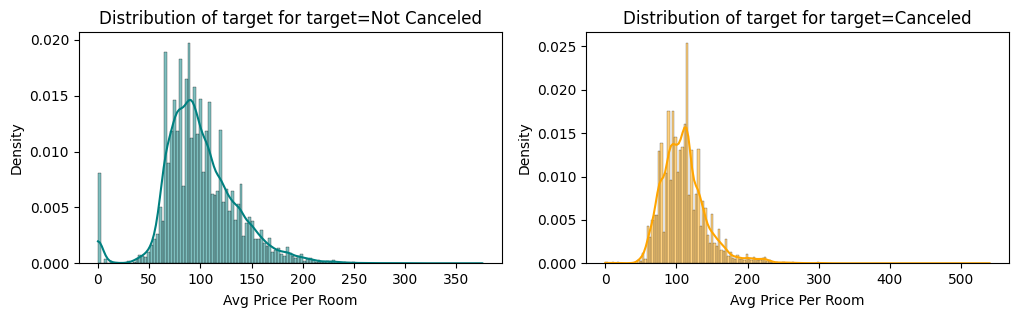

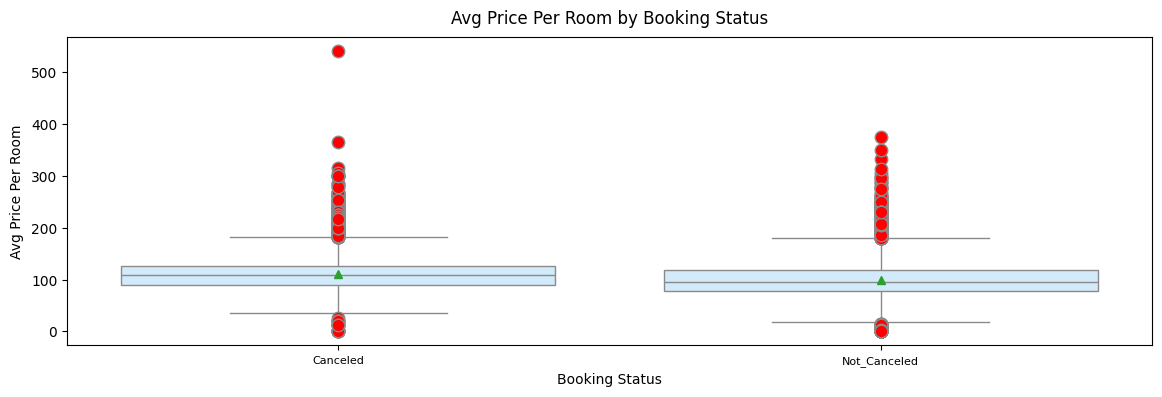

__________________________________________________________________________________________________________________________


In [21]:
# Create distribution plots and box plots for the listed numerical attributes by booking status
df_list = ['arrival_date', 'lead_time', 'arrival_month', 'avg_price_per_room']
for col in df_list:
    distplot_by_cat_and_num_att(df_Inn, 'booking_status', col)  
    boxplot_by_cat_and_num_att(df_Inn, 'booking_status', col)  
    print('_'*122)

#### Observations:
* Certain days of the month appear more likely to cancel than other days
* Cancels have higher lead time median and averages than non-cancels
* December and January arrival month bookings have the least number of cancellations
* September and October arrival months have the highest number of cancellations
* Cancellations appear to occur at slightly higher average room prices

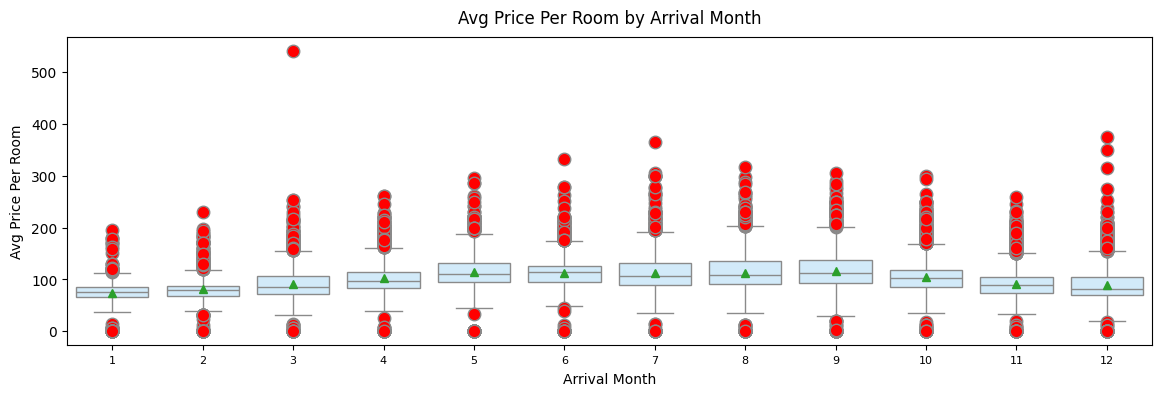

__________________________________________________________________________________________________________________________


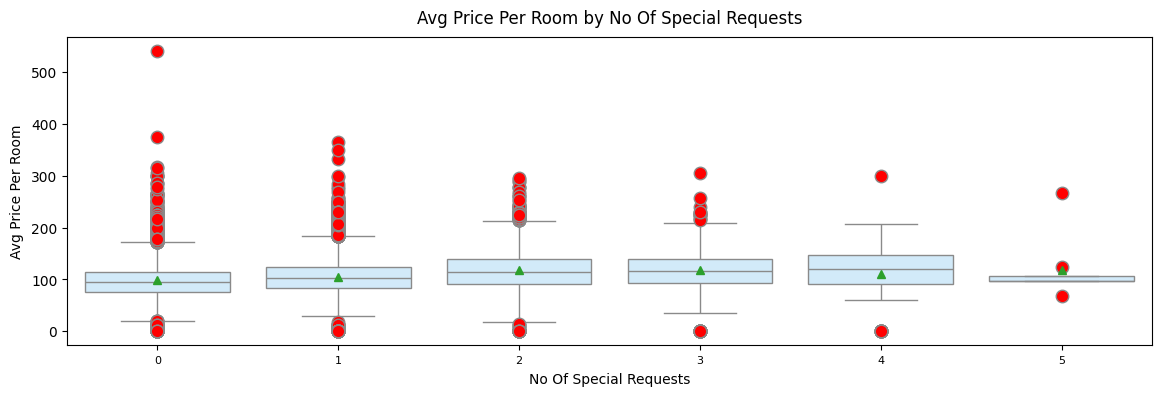

__________________________________________________________________________________________________________________________


In [22]:
# Create box plots for the listed numerical attributes by average proce per room
df_list = ['arrival_month', 'no_of_special_requests']
for col in df_list:
    boxplot_by_num_and_num_att(df_Inn, col, 'avg_price_per_room')
    #distplot_by_cat_and_num_att(df_Inn, 'booking_status', col)  
    #boxplot_by_cat_and_num_att(df_Inn, 'booking_status', col)  
    print('_'*122)


#### Observations:
* The average price per room inceases during the spring and summer months, lowering in the fall and winter months
* The average price per room does not appear to vary for rooms with special requests vs rooms without special requests

Crosstab of Booking Status and No Of Adults
________________________________________________________________________________
booking_status  Canceled  Not_Canceled    All  Pct_Cancel
no_of_adults                                             
All                11885         24390  36275       32.76
2                   9119         16989  26108       34.93
1                   1856          5839   7695       24.12
3                    863          1454   2317       37.25
0                     44            95    139       31.65
4                      3            13     16       18.75


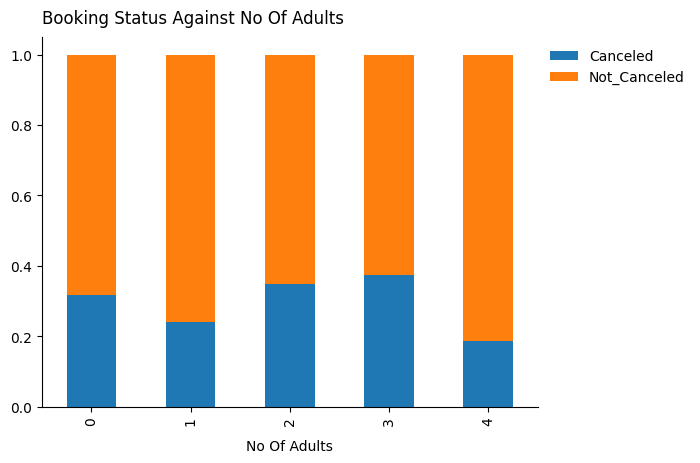

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and No Of Children
________________________________________________________________________________
booking_status  Canceled  Not_Canceled    All  Pct_Cancel
no_of_children                                           
All                11885         24390  36275       32.76
0                  10882         22695  33577       32.41
1                    540          1078   1618       33.37
2                    457           601   1058       43.19
3                      5            14     19       26.32
9                      1             1      2       50.00
10                     0             1      1        0.00


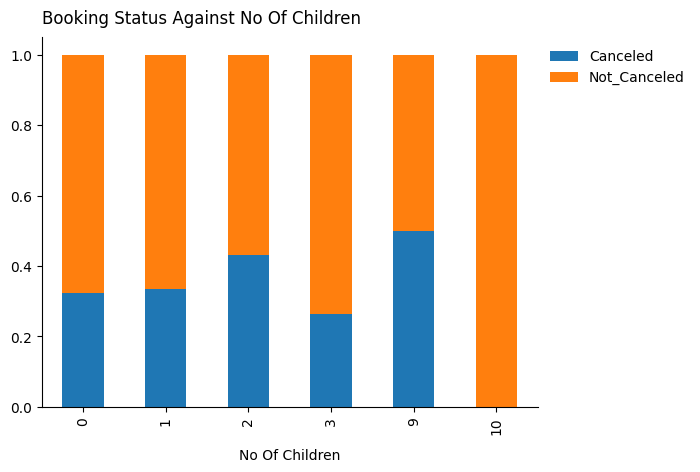

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and No Of Week Nights
________________________________________________________________________________
booking_status     Canceled  Not_Canceled    All  Pct_Cancel
no_of_week_nights                                           
All                   11885         24390  36275       32.76
2                      3997          7447  11444       34.93
3                      2574          5265   7839       32.84
1                      2572          6916   9488       27.11
4                      1143          1847   2990       38.23
0                       679          1708   2387       28.45
5                       632           982   1614       39.16
6                        88           101    189       46.56
10                       53             9     62       85.48
7                        52            61    113       46.02
8            

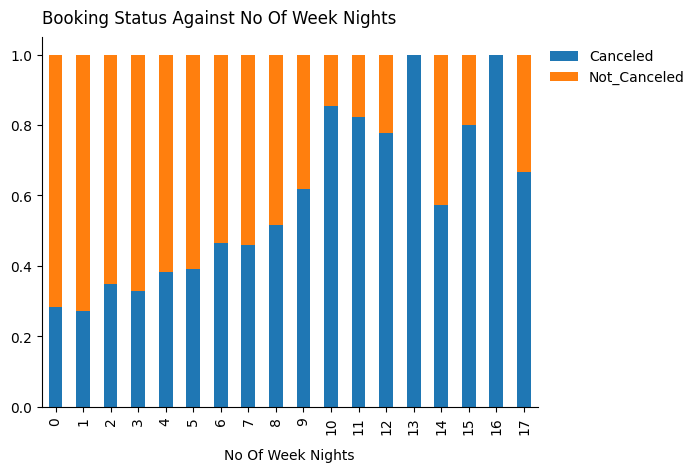

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and No Of Weekend Nights
________________________________________________________________________________
booking_status        Canceled  Not_Canceled    All  Pct_Cancel
no_of_weekend_nights                                           
All                      11885         24390  36275       32.76
0                         5093         11779  16872       30.19
1                         3432          6563   9995       34.34
2                         3157          5914   9071       34.80
4                           83            46    129       64.34
3                           74            79    153       48.37
5                           29             5     34       85.29
6                           16             4     20       80.00
7                            1             0      1      100.00


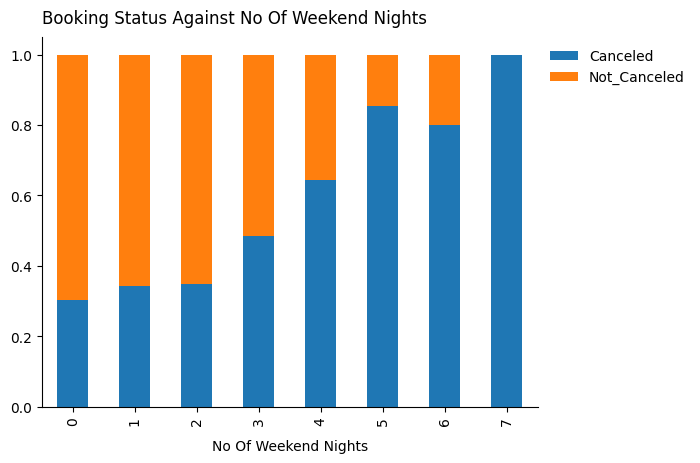

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and Type Of Meal Plan
________________________________________________________________________________
booking_status     Canceled  Not_Canceled    All  Pct_Cancel
type_of_meal_plan                                           
All                   11885         24390  36275       32.76
Meal Plan 1            8679         19156  27835       31.18
Not Selected           1699          3431   5130       33.12
Meal Plan 2            1506          1799   3305       45.57
Meal Plan 3               1             4      5       20.00


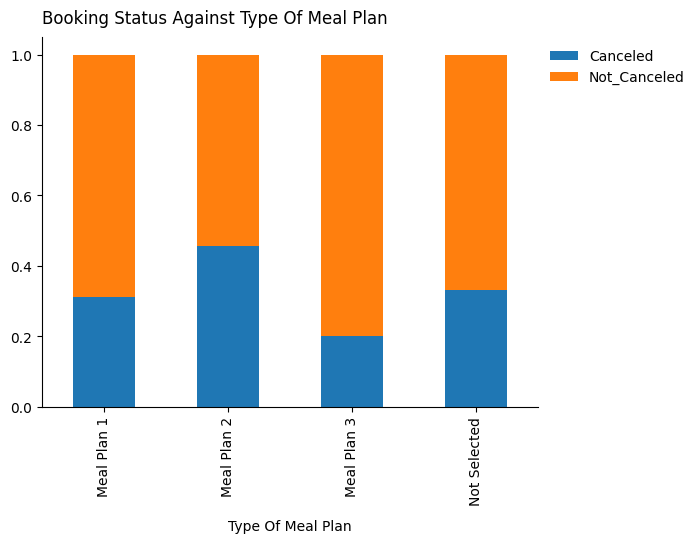

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and Required Car Parking Space
________________________________________________________________________________
booking_status              Canceled  Not_Canceled    All  Pct_Cancel
required_car_parking_space                                           
All                            11885         24390  36275       32.76
0                              11771         23380  35151       33.49
1                                114          1010   1124       10.14


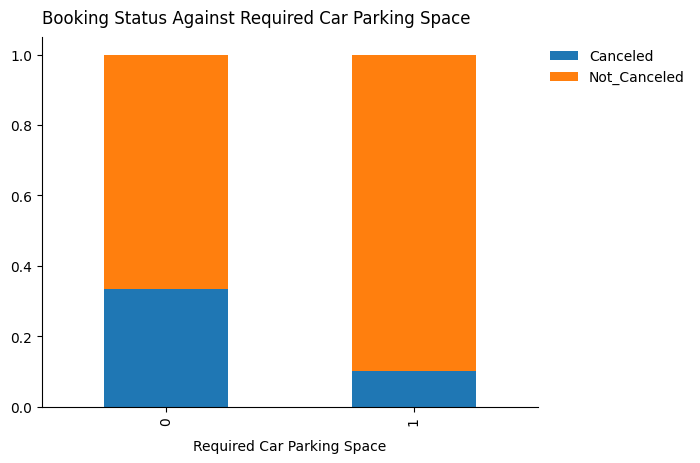

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and Room Type Reserved
________________________________________________________________________________
booking_status      Canceled  Not_Canceled    All  Pct_Cancel
room_type_reserved                                           
All                    11885         24390  36275       32.76
Room_Type 1             9072         19058  28130       32.25
Room_Type 4             2069          3988   6057       34.16
Room_Type 6              406           560    966       42.03
Room_Type 2              228           464    692       32.95
Room_Type 5               72           193    265       27.17
Room_Type 7               36           122    158       22.78
Room_Type 3                2             5      7       28.57


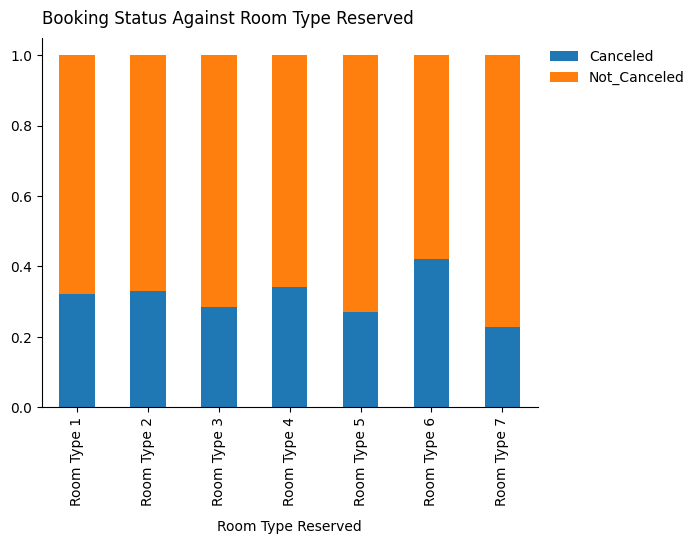

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and Repeated Guest
________________________________________________________________________________
booking_status  Canceled  Not_Canceled    All  Pct_Cancel
repeated_guest                                           
All                11885         24390  36275       32.76
0                  11869         23476  35345       33.58
1                     16           914    930        1.72


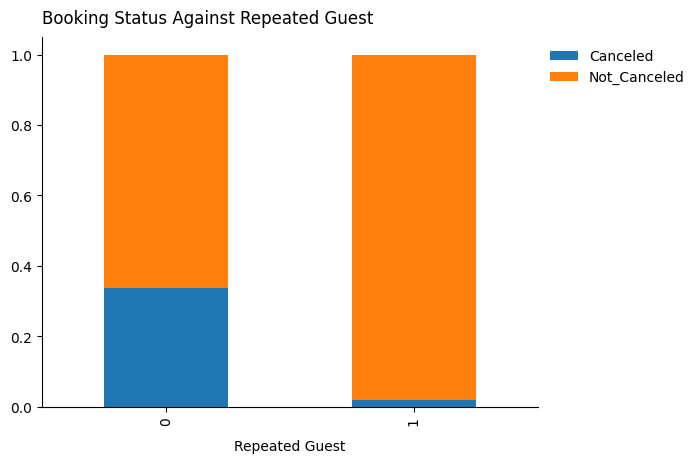

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and No Of Previous Cancellations
________________________________________________________________________________
booking_status                Canceled  Not_Canceled    All  Pct_Cancel
no_of_previous_cancellations                                           
All                              11885         24390  36275       32.76
0                                11869         24068  35937       33.03
1                                   11           187    198        5.56
13                                   4             0      4      100.00
3                                    1            42     43        2.33
2                                    0            46     46        0.00
4                                    0            10     10        0.00
5                                    0            11     11        0.00
6             

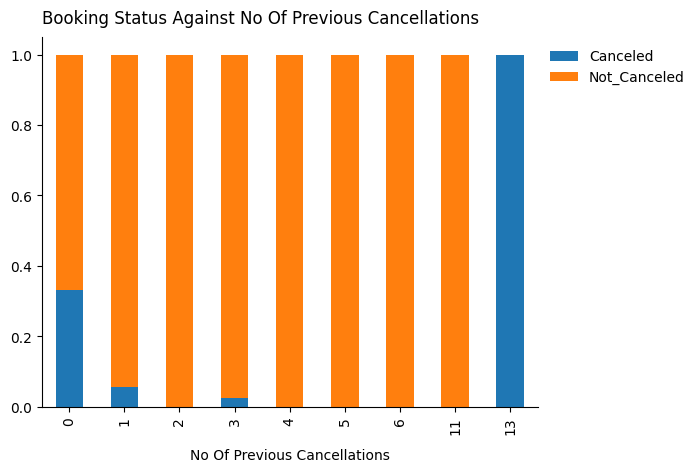

__________________________________________________________________________________________________________________________ 

Crosstab of Booking Status and Market Segment Type
________________________________________________________________________________
booking_status       Canceled  Not_Canceled    All  Pct_Cancel
market_segment_type                                           
All                     11885         24390  36275       32.76
Online                   8475         14739  23214       36.51
Offline                  3153          7375  10528       29.95
Corporate                 220          1797   2017       10.91
Aviation                   37            88    125       29.60
Complementary               0           391    391        0.00


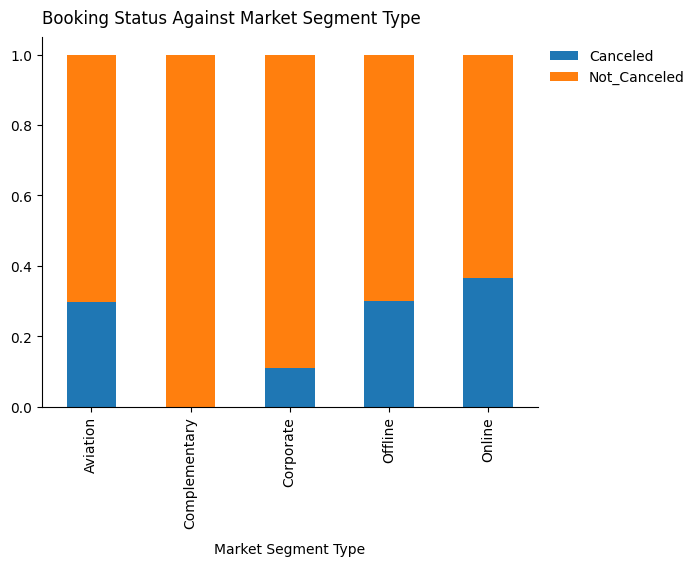

__________________________________________________________________________________________________________________________ 



In [23]:
    # Create stacked bar plots for the listed numerical attributes
    df_list = ['no_of_adults','no_of_children', 'no_of_week_nights','no_of_weekend_nights',
               'type_of_meal_plan','required_car_parking_space','room_type_reserved','repeated_guest',
               'no_of_previous_cancellations','market_segment_type']
    for col in df_list:
        stacked_barplot(df_Inn, 'booking_status', col)
        print('_'*122,'\n')

#### Observations:
* Cancellations occured more often for a 2 adult booking
* Cancellations occured more often for a booking with no children
* Bookings with more than 9 week days have over a 60% rate of cancellation
* Bookings with more than 4 weekend days have over a 60% rate of cancellation
* Cancellations occured more often for the meal plan 1
* Cancellations occured more often when requiring a car parking space
* Cancellations occured more often for the room type 1
* Repeat customers cancel 1.7% of the time
* Online bookings have a higher rate of cancellations
* Complimentary bookings have no cancellations

Crosstab of Booking Status and No Of Family Members
________________________________________________________________________________
booking_status        Canceled  Not_Canceled   All  Pct_Cancel
no_of_family_members                                          
All                        959          1600  2559       37.48
3                          535          1020  1555       34.41
4                          395           501   896       44.08
2                           23            67    90       25.56
5                            5            10    15       33.33
11                           1             0     1      100.00
10                           0             1     1        0.00
12                           0             1     1        0.00


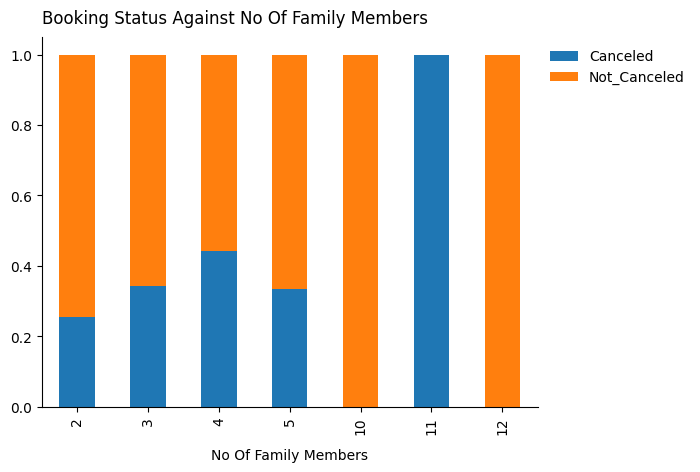

In [137]:
# Create a stacked bar plot for number of 2 or more family members for a booking
df_AWC = df_Inn[(df_Inn['no_of_children'] > 0) & (df_Inn['no_of_adults'] > 0)].copy()
df_AWC['no_of_family_members'] = (
    df_AWC['no_of_adults'] + df_AWC['no_of_children'])
stacked_barplot(df_AWC, 'booking_status', 'no_of_family_members')

#### Observations:
* Very few bookings (2415) were created with at least one adult and child

Crosstab of Booking Status and Total Days
________________________________________________________________________________
booking_status  Canceled  Not_Canceled    All  Pct_Cancel
total_days                                               
All                11885         24390  36275       32.76
3                   3586          6466  10052       35.67
2                   2899          5573   8472       34.22
4                   1941          3952   5893       32.94
1                   1466          5138   6604       22.20
5                    823          1766   2589       31.79
6                    465           566   1031       45.10
7                    383           590    973       39.36
8                     79           100    179       44.13
10                    58            51    109       53.21
9                     53            58    111       47.75
14                    27             5     32       84.38
15                    26             5     31       83.87
13     

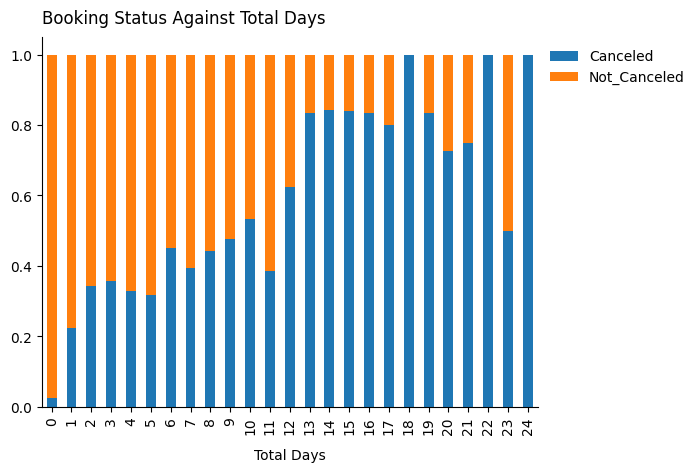

In [25]:
# Create a stacked bar plot of the total days booked
df_Inn_Days = df_Inn.copy()
df_Inn_Days['total_days'] = (df_Inn_Days['no_of_week_nights'] + df_Inn_Days['no_of_weekend_nights'])
stacked_barplot(df_Inn_Days, 'booking_status', 'total_days')

#### Observations:
* As the total number of days increases for a booking, the rate of cancellations also increases

### Questions

### 1. What are the busiest months in the hotel?


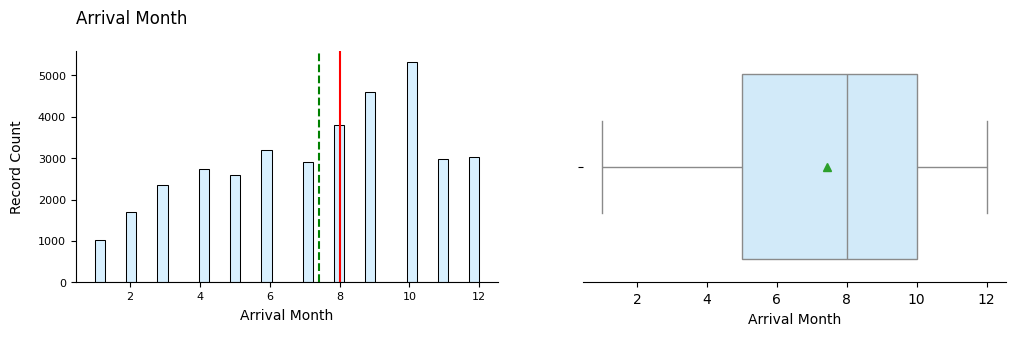

__________________________________________________________________________________________________________________________


In [26]:
# Call the function hist_box_plots for arrival month
hist_box_plots(df_Inn, 'arrival_month')

* The busiest months are October, September and August

### 2. Which market segment do most of the guests come from?

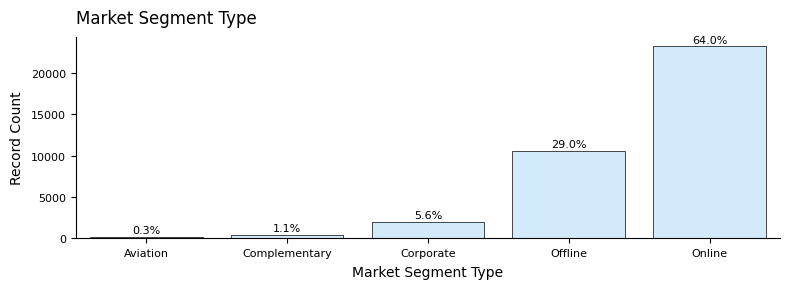

__________________________________________________________________________________________________________________________


In [27]:
# Call the function bar_plots for the market segment type
bar_plots(df_Inn, 'market_segment_type') 

* Most guests come from the online market segment

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

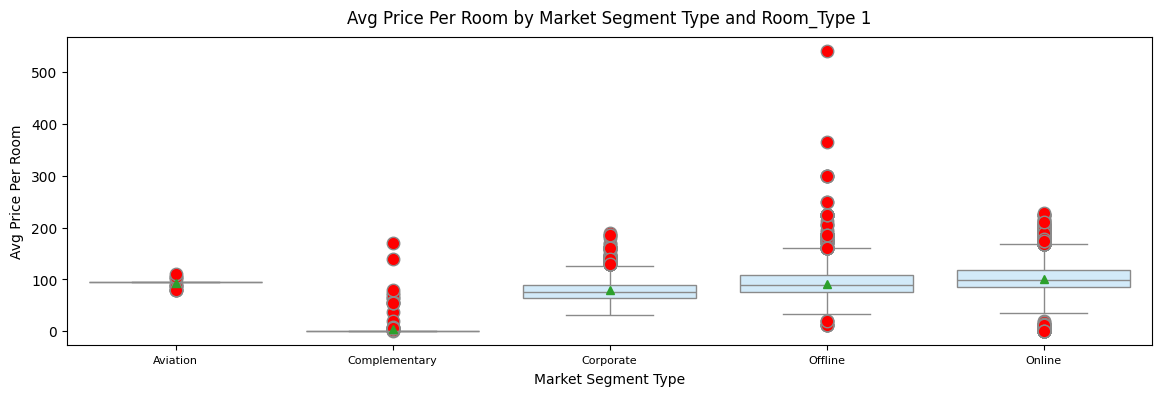

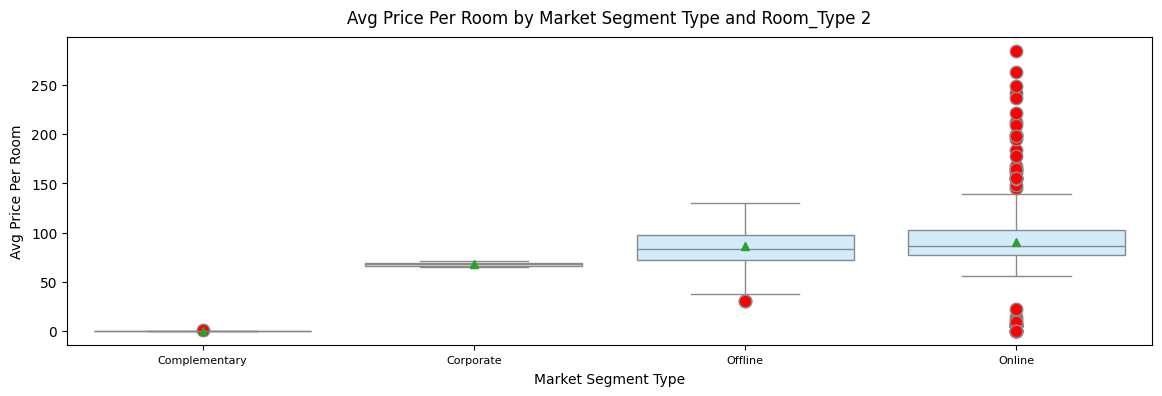

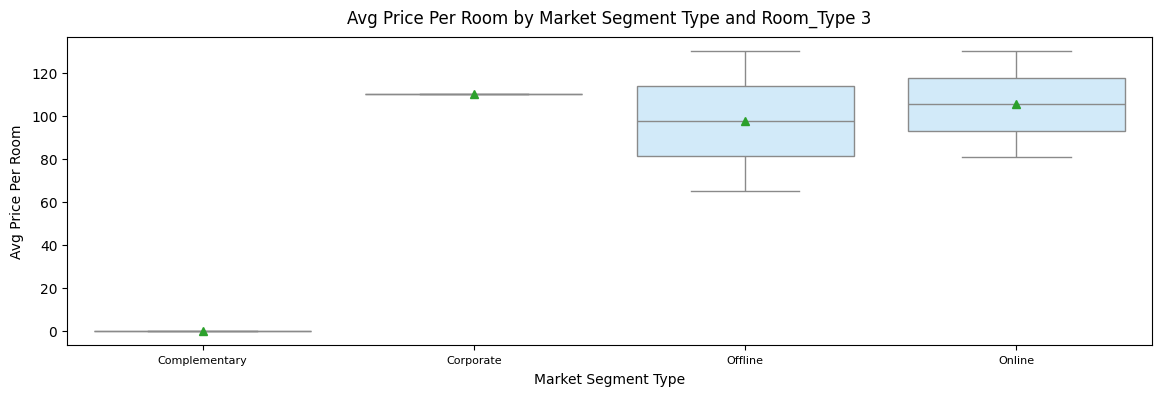

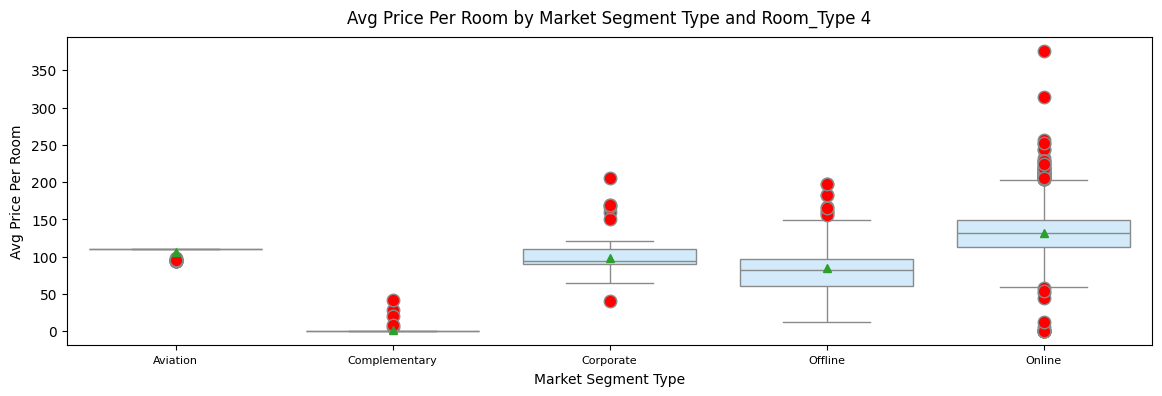

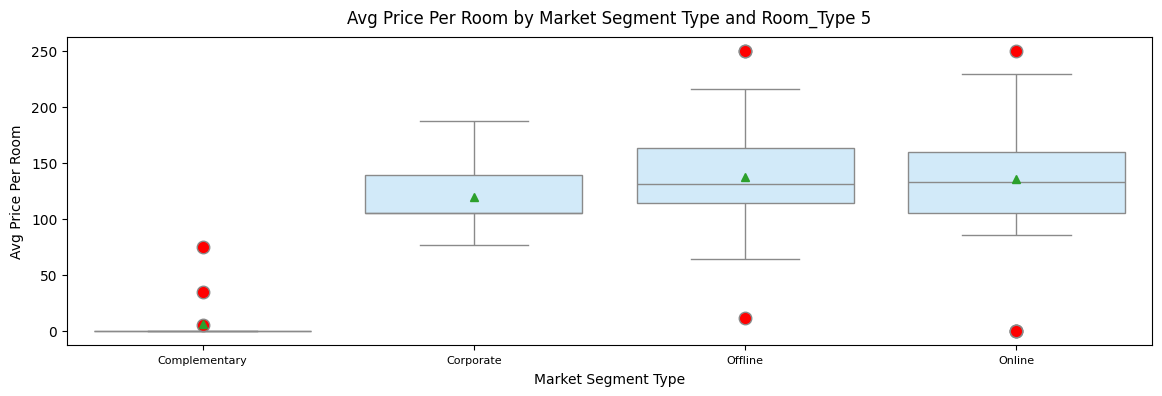

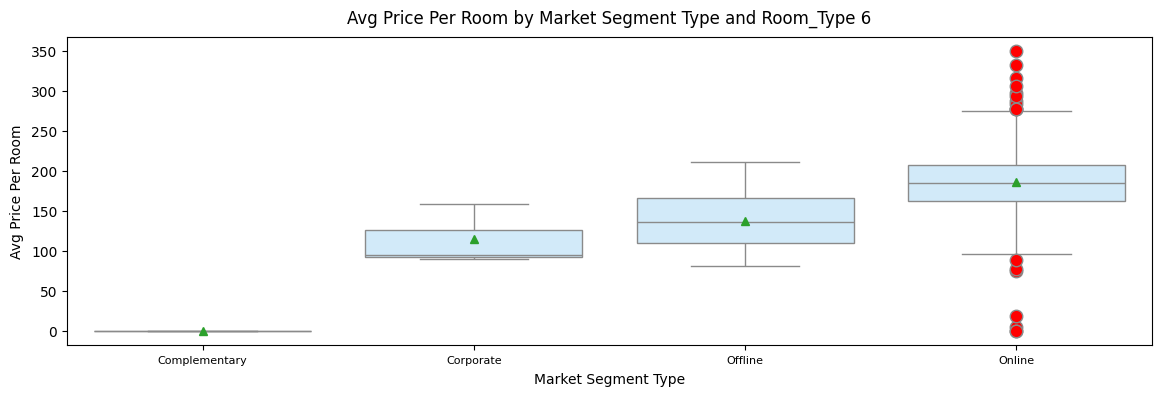

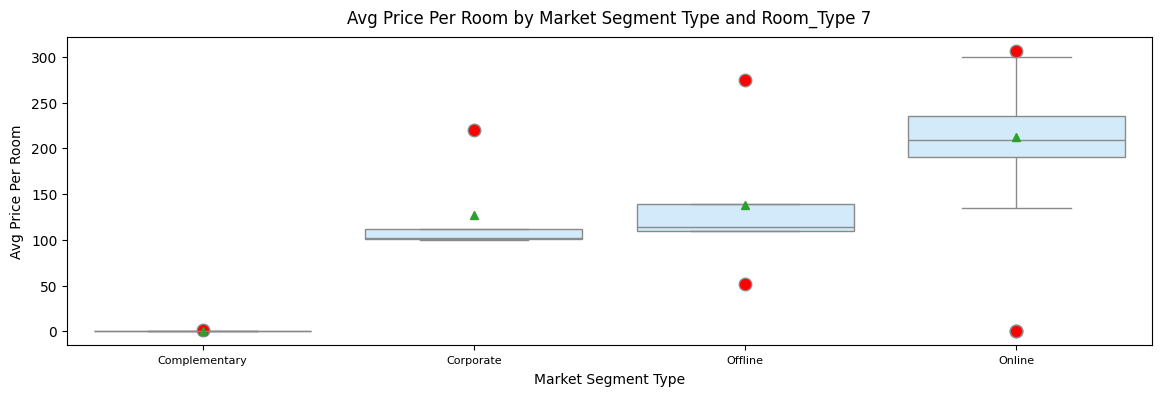

In [28]:
# Retrieve list of unique room types reserved
cols = np.unique(df_Inn['room_type_reserved']).tolist()

# For each room type, call the function boxplots_by_cat_and_num_atts
# for the average price per room by the market segment type
for i in cols:
 boxplot_by_cat_and_num_att(df_Inn[df_Inn['room_type_reserved']==i], 
                              'market_segment_type', 
                              'avg_price_per_room', 
                              subset = i)

#### Observations:
* For room type 1, the offline segment has more higher priced outliers than the other segements. On average, the 
  prices for the corporate segments is slightly less than the aviation, offline and online segments. The complementary
  segment has an average price of zero, but there are outlier prices present
* For room type 2, the online segment has more higher priced outliers than the other segments. On average, the 
  prices for the corporate segments is slightly less than the offline and online segments. The complementary
  segment has an average price of zero, but there are outlier prices present
* For room type 3, the prices for the corporate segments on average is slightly less than the offline and online segments.   The complementary segment has an average price of zero
* For room type 4, the online segment has more higher priced outliers than the other segments. On average, the 
  prices for the offline segments is slightly less than the aviation, offline and corporate segments.
* For room type 5 the prices for the corporate segments on average, is slightly less than the offline and online segments.
  The complementary segment has an average price of zero, but there are outlier prices present
* For room type 6, the online segment has more higher priced outliers than the other segments. On average, the 
  prices for the corporate segments is slightly less than the offline and online segments. The complementary segment
  has an average price of zero
* For room type 7, the online segment has more higher prices than the other segments. On average, the 
  prices for the corporate segments is slightly less than the offline and online segments. The complementary segment
  has an average price of zero, but there are outlier prices present

### 4. What percentage of bookings are canceled?

Crosstab of Booking Status and Arrival Month
________________________________________________________________________________
booking_status  Canceled  Not_Canceled    All  Pct_Cancel
arrival_month                                            
All                11885         24390  36275       32.76
10                  1880          3437   5317       35.36
9                   1538          3073   4611       33.36
8                   1488          2325   3813       39.02
7                   1314          1606   2920       45.00
6                   1291          1912   3203       40.31
4                    995          1741   2736       36.37
5                    948          1650   2598       36.49
11                   875          2105   2980       29.36
3                    700          1658   2358       29.69
2                    430          1274   1704       25.23
12                   402          2619   3021       13.31
1                     24           990   1014        2.37


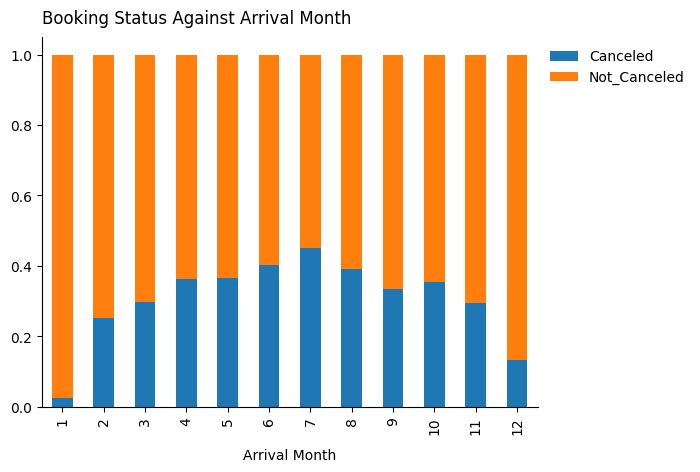

__________________________________________________________________________________________________________________________ 



In [29]:
# Create stacked bar plts for the listed numerical attributes
df_list = ['arrival_month']
for col in df_list:
    stacked_barplot(df_Inn, 'booking_status', col)
    print('_'*122,'\n')

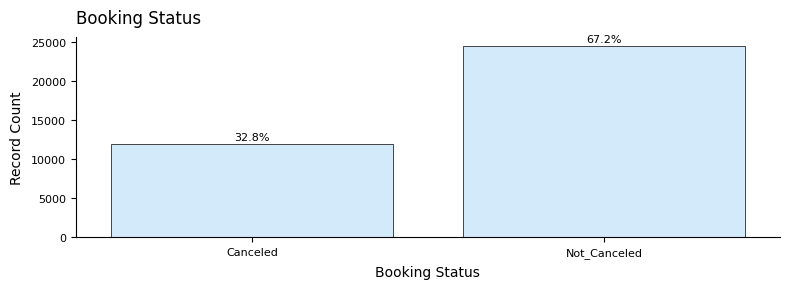

__________________________________________________________________________________________________________________________


In [30]:
bar_plots(df_Inn, 'booking_status')  

#### Observations:
* The percentage of canceled bookings is 33%
* July has the higherst rate percentage rate at 45% 

### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

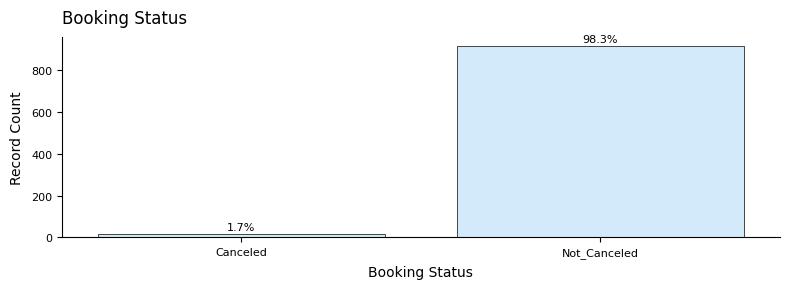

__________________________________________________________________________________________________________________________


In [31]:
bar_plots(df_Inn[df_Inn['repeated_guest']==1], 'booking_status') 

#### Observations:
* The percentage of repeating guests cancelling is 2%

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Crosstab of Booking Status and No Of Special Requests
________________________________________________________________________________
booking_status          Canceled  Not_Canceled    All  Pct_Cancel
no_of_special_requests                                           
All                        11885         24390  36275       32.76
0                           8545         11232  19777       43.21
1                           2703          8670  11373       23.77
2                            637          3727   4364       14.60
3                              0           675    675        0.00
4                              0            78     78        0.00
5                              0             8      8        0.00


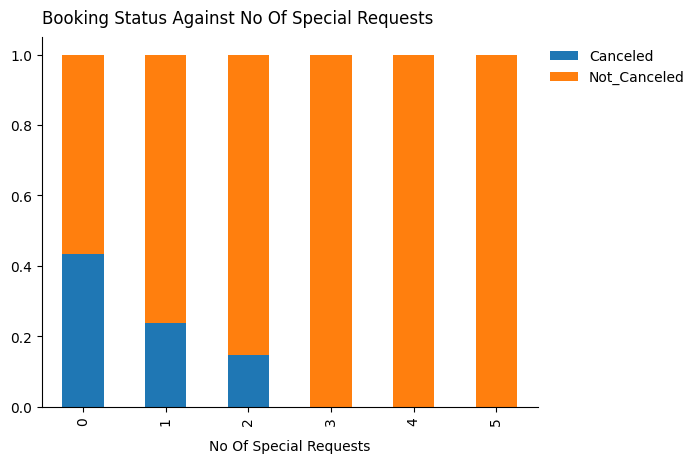

__________________________________________________________________________________________________________________________ 



In [32]:
# Create stacked bar plts for the listed numerical attributes
df_list = ['no_of_special_requests']
for col in df_list:
    stacked_barplot(df_Inn, 'booking_status', col)
    print('_'*122,'\n')

In [33]:
contingency_tbl = pd.crosstab(df_Inn['no_of_special_requests'],
                              df_Inn['booking_status'])

print(contingency_tbl, '\n')

# Assign the hypothesis test
Ho = "Number of special requests has no effect on home ownership"  # Stating the Null Hypothesis
Ha = "Number of special requests has an effect on home ownership"  # Stating the Alternate Hypothesis

# Find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_tbl)

# Determine if the hypothesis is rejected or failed to reject based on the p-value and level of significance
if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

booking_status          Canceled  Not_Canceled
no_of_special_requests                        
0                           8545         11232
1                           2703          8670
2                            637          3727
3                              0           675
4                              0            78
5                              0             8 

Number of special requests has an effect on home ownership as the p_value (0.0) < 0.05


#### Observations:
* As the number of special requests are required, the less chance occurs of a cancellation
* As the p-value is lower than the significance level, we can reject the null hypothesis. Hence we have sufficient statistical evidence to conclude the number of special requests is dependent on the booking status is the same at a 5% signicance level

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [34]:
# Determine the number of missing values in all the attributes
df_Inn.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [35]:
# Check to see if any bookings have zero adults and zero children
df_Inn[(df_Inn['no_of_adults']==0) & (df_Inn['no_of_children']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


#### Observations:
* There are no missing values to treat

### Feature Engineering

In [36]:
# Make a copy of the df_Inn dataframe
df_Inn_Copy = df_Inn.copy()

In [37]:
# Create new columns arrival date, booking date, and booking month
df_Inn_Copy['arrival_dt'] = pd.to_datetime({'year':df_Inn_Copy['arrival_year'],
                                            'month':df_Inn_Copy['arrival_month'], 
                                            'day':df_Inn_Copy['arrival_date']},
                                            format='%Y%m%d', errors='coerce' )
df_Inn_Copy['total_days'] = (df_Inn_Copy['no_of_week_nights'] + df_Inn_Copy['no_of_weekend_nights'])

In [38]:
# Check for and missing values
df_Inn_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

#### Observations:
* The new fields arrival_dt and day_of_week_arrival have missing values

In [39]:
# Examine records with missing values
df_Inn_Copy[df_Inn_Copy['arrival_dt'].isna()].shape[0]

37

#### Observations:
* 37 records have an improper arrival date of 2/29/2018. The maximum date is 2/28/2018 for that year and month.

In [40]:
# Drop the rows with the missing values
df_Inn_Copy = df_Inn_Copy.dropna(subset=['arrival_dt'])

# Examine records with missing values
df_Inn_Copy[df_Inn_Copy['arrival_dt'].isna()].head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_dt,total_days


In [41]:
#Look for records where the total days is 0
df_Inn_Copy[df_Inn_Copy['total_days']==0].shape[0]

78

#### Observations: 
78 records have zero total days

In [42]:
# Drop rows where the total days is zero for a booking. These were found in the EDA process
zero_days = df_Inn_Copy[df_Inn_Copy['total_days']==0].index
df_Inn_Copy.drop(zero_days, inplace=True)
df_Inn_Copy[df_Inn_Copy['total_days']==0].head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_dt,total_days


In [43]:
# Drop the arrival_date column as day is too granular a level
# Drop arrival year column as year is too high a level
# Drop booking_id as this is a sequential value
# Drop arrival_dt as it was used to determine any invalid dates
# Drop total_days as it was used to find bookings with zero days
df_Inn_Copy.drop(['arrival_year','arrival_date','Booking_ID','arrival_dt','total_days'], axis=1, inplace=True)

In [44]:
# Change the room type reserved value to the last string character which is a number
def ChangeRoomType(row):
    return row[-1]

df_Inn_Copy['room_type_reserved'] = df_Inn_Copy['room_type_reserved'].apply(ChangeRoomType)


In [45]:
# Change type_of_meal_plan, room_type_reserved, and booking month to integers
df_Inn_Copy = df_Inn_Copy.astype({'room_type_reserved':np.int64})

In [46]:
# Change arrival month and booking month to a string to create dummy variables
df_Inn_Copy = df_Inn_Copy.astype({'arrival_month':str})

In [47]:
# Check the datatypes of columns
df_Inn_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36160 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36160 non-null  int64  
 1   no_of_children                        36160 non-null  int64  
 2   no_of_weekend_nights                  36160 non-null  int64  
 3   no_of_week_nights                     36160 non-null  int64  
 4   type_of_meal_plan                     36160 non-null  object 
 5   required_car_parking_space            36160 non-null  int64  
 6   room_type_reserved                    36160 non-null  int64  
 7   lead_time                             36160 non-null  int64  
 8   arrival_month                         36160 non-null  object 
 9   market_segment_type                   36160 non-null  object 
 10  repeated_guest                        36160 non-null  int64  
 11  no_of_previous_cance

In [48]:
# Exmaine first 5 rows for changes
df_Inn_Copy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,1,48,4,Online,0,0,0,94.50,0,Canceled


### Outlier Detection

In [49]:
# Create a new numerical column list from the df_Inn_Copy data
df_num_list = [df_Inn_Copy.columns[x] for x in range(len(df_Inn_Copy.columns)) 
               if df_Inn_Copy.dtypes[x] in ('float64', 'int64')]

In [50]:
# Define function to find the outliers of an attribute
def define_outlier(df, col):
    """
    Define the IQR formula and determine which loaded records are for a columns are outliers
    
    df: datafame
    col: column name
    """
    
    # Define the Q1, Q2, and IQR values to determine outlier range
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    # Determine if a record is an outlier for either the upper or lower whiskers
    # Assign the records a boolean value 
    BM = (df[col]>(Q3+1.5*IQR)) | (df[col]<(Q1-1.5*IQR))
    
    # Return the dataframe boolean values
    return df[BM]

In [51]:
# Define function to find the outliers in a dataframe
def find_outliers(data):
    """
    Find all the numerical outliers in the dataframe
    
    data = dataframe
    """
    
    # Print the number of rows in the dataframe
    print('Total rows:{}'.format(data.shape[0]))
    print('Number of Outliers:')
    print('-'*45)
    
    # Cycle through the numerical columns in the df_num_list list
    for cols in df_num_list:
        
        # Call the define_outlier function to determine which records for a column are outliers
        # Save the outliers in the df_OM dataframe
        df_OM = define_outlier(data, cols)
        
        # Print the column name, number of outliers, and percent of outliers to the total records
        print('{:<40}: {:<5}   Percent:{}%'.format(
            cols,df_OM[cols].count(), round(df_OM[cols].count()/data.shape[0]*100,1)))

In [52]:
# Call the find_outliers function for the dataframe
find_outliers(df_Inn_Copy)

Total rows:36160
Number of Outliers:
---------------------------------------------
no_of_adults                            : 10116   Percent:28.0%
no_of_children                          : 2689    Percent:7.4%
no_of_weekend_nights                    : 21      Percent:0.1%
no_of_week_nights                       : 323     Percent:0.9%
required_car_parking_space              : 1121    Percent:3.1%
room_type_reserved                      : 8119    Percent:22.5%
lead_time                               : 1189    Percent:3.3%
repeated_guest                          : 922     Percent:2.5%
no_of_previous_cancellations            : 336     Percent:0.9%
no_of_previous_bookings_not_canceled    : 805     Percent:2.2%
avg_price_per_room                      : 1617    Percent:4.5%
no_of_special_requests                  : 760     Percent:2.1%


#### Observations:
* There are a number of outliers in the dataset
* These will not be treated as they did not appear as errors

## EDA

- It is a good idea to explore the data once again after manipulating it.

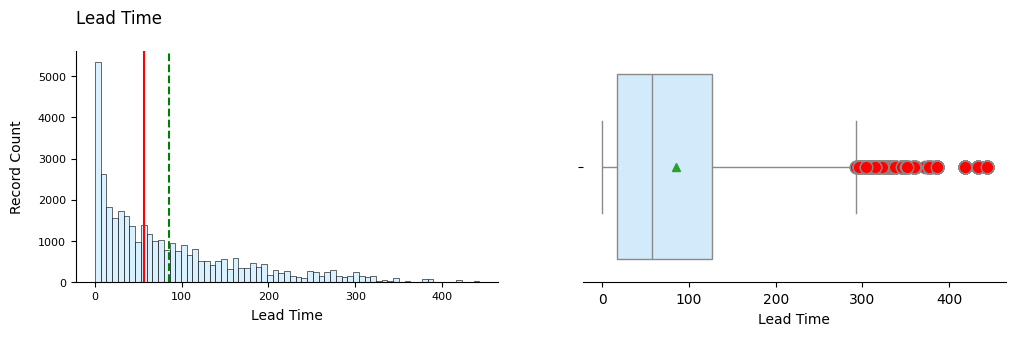

__________________________________________________________________________________________________________________________


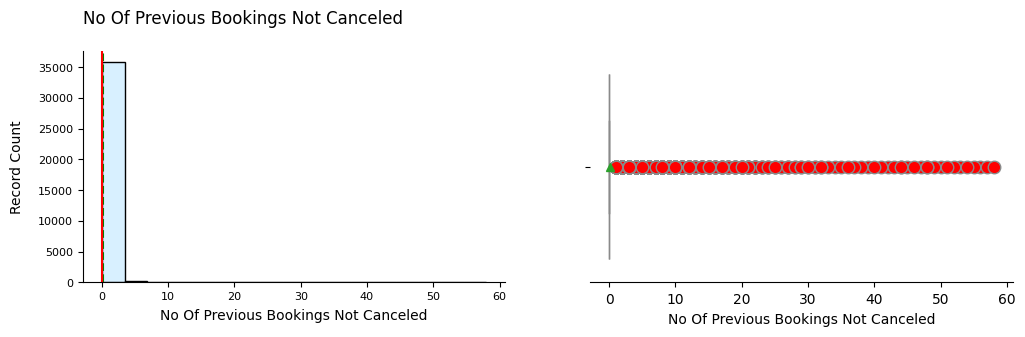

__________________________________________________________________________________________________________________________


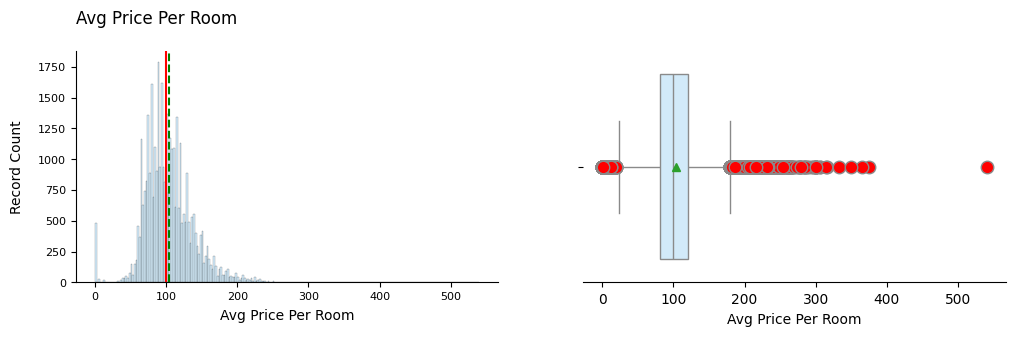

__________________________________________________________________________________________________________________________


In [53]:
# Create histograms and box plots for numerical attributes with many values 

# Create a list of the numerical attributes
df_num_list = [df_Inn_Copy.columns[x] for x in range(len(df_Inn_Copy.columns)) 
               if df_Inn_Copy.dtypes[x] in ('float64', 'int64')]

# Call the hist_box_plot function for each item in the list that has more than 31 values
# 31 was picked due to maximum calendar days in a month
for col in df_num_list:
    if df_Inn_Copy[col].nunique() >= 32:
        hist_box_plots(df_Inn_Copy, col)   

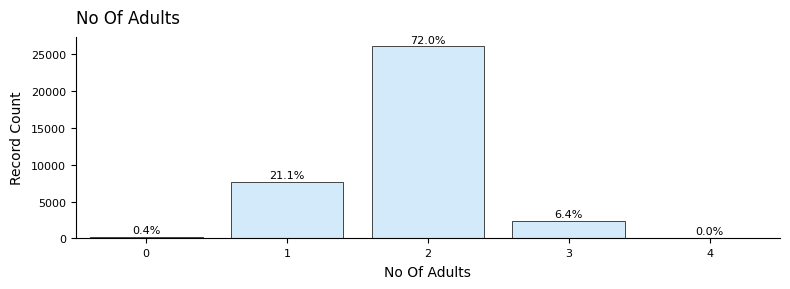

__________________________________________________________________________________________________________________________


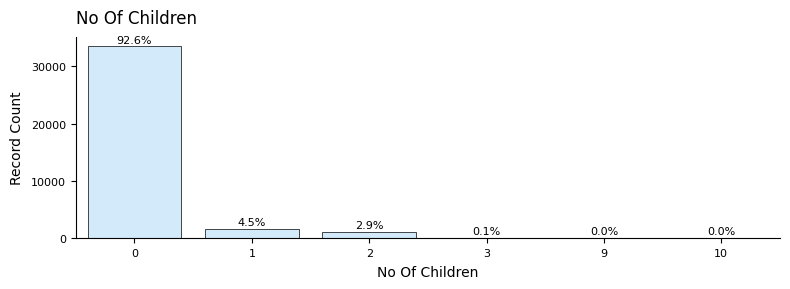

__________________________________________________________________________________________________________________________


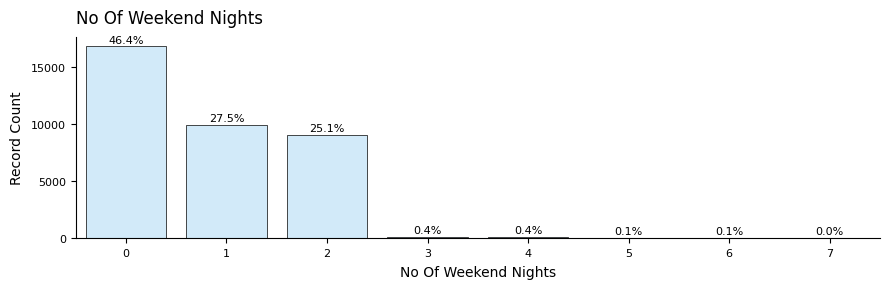

__________________________________________________________________________________________________________________________


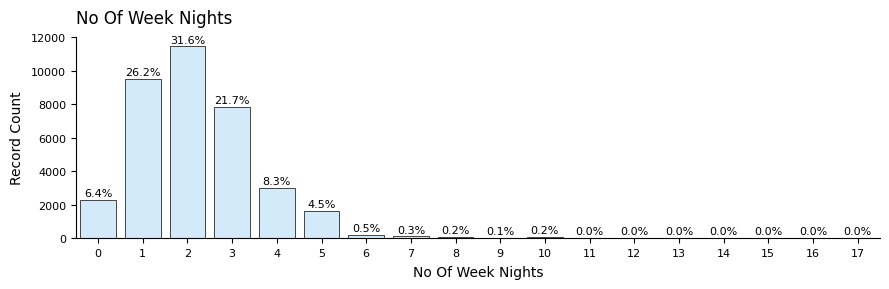

__________________________________________________________________________________________________________________________


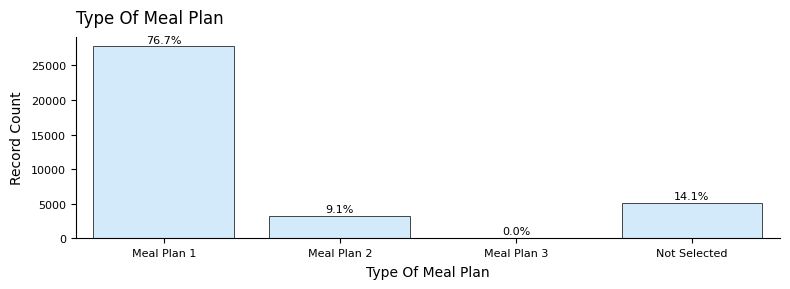

__________________________________________________________________________________________________________________________


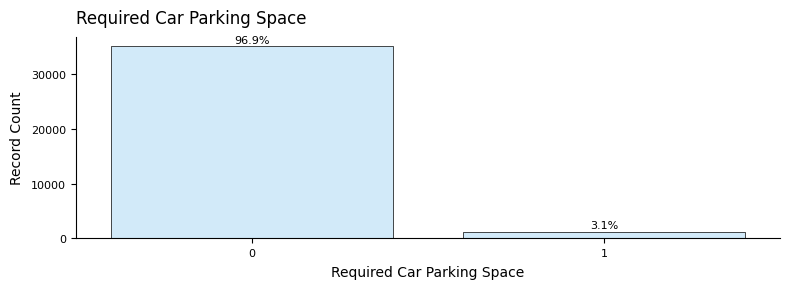

__________________________________________________________________________________________________________________________


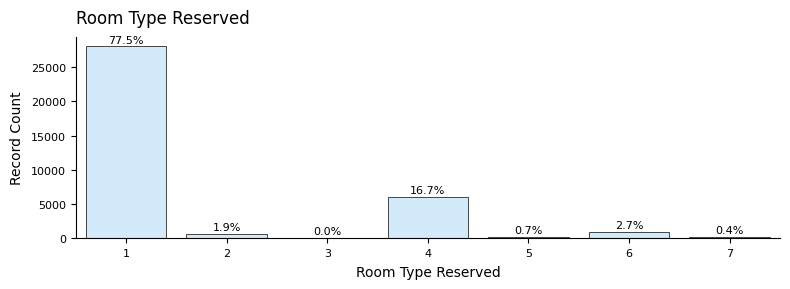

__________________________________________________________________________________________________________________________


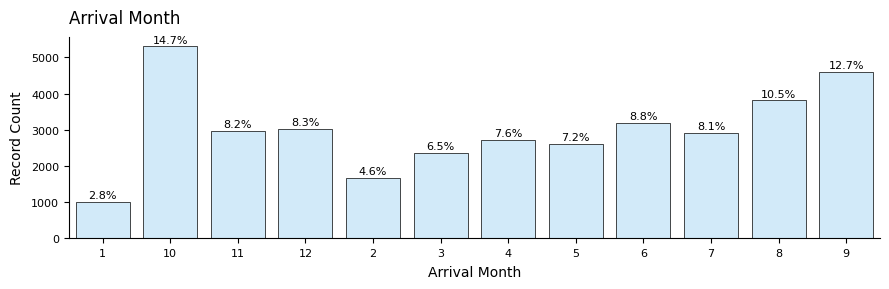

__________________________________________________________________________________________________________________________


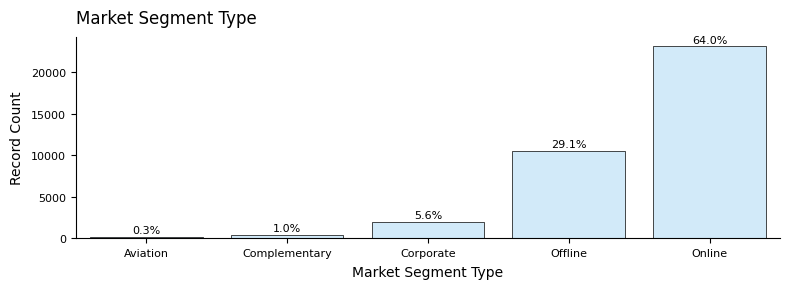

__________________________________________________________________________________________________________________________


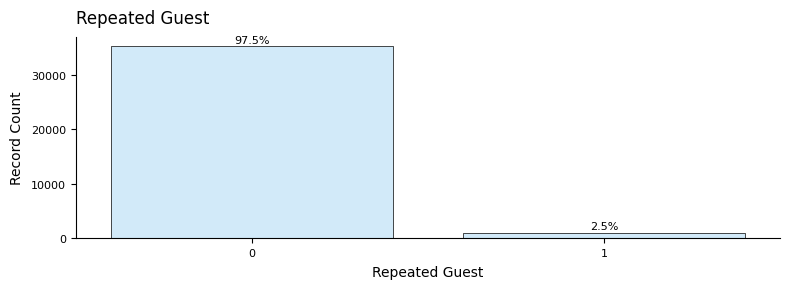

__________________________________________________________________________________________________________________________


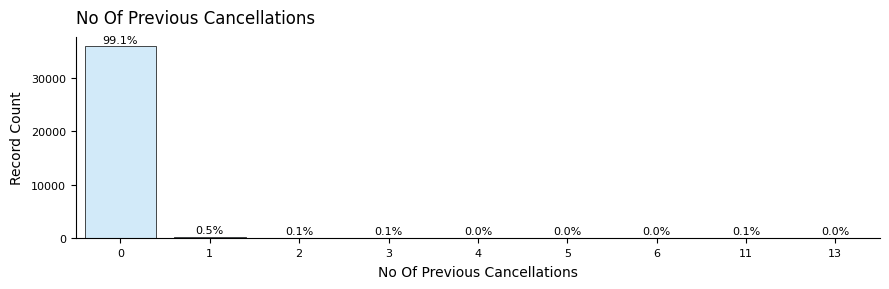

__________________________________________________________________________________________________________________________


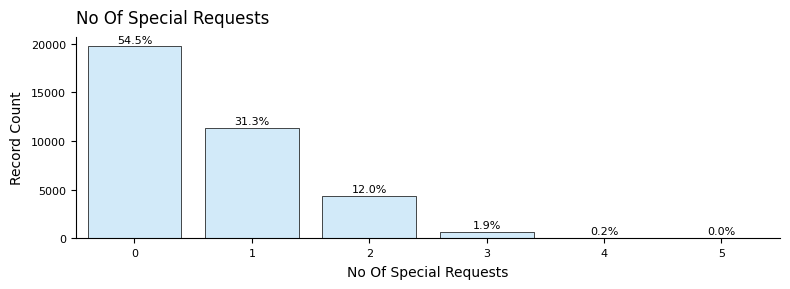

__________________________________________________________________________________________________________________________


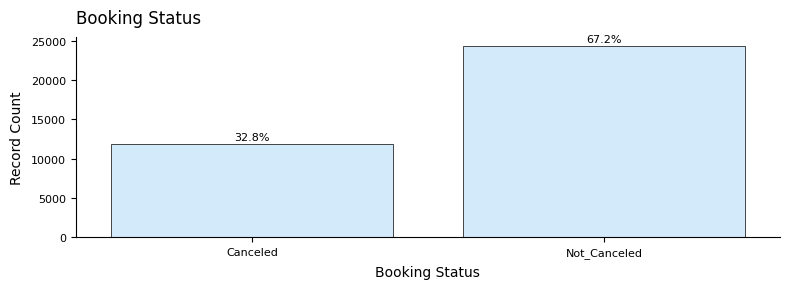

__________________________________________________________________________________________________________________________


In [54]:
# Create bar plots for other attributes
                  
# Create a list of the attributes
df_cat_list = df_Inn_Copy.columns.tolist()                

# Call the bar_plot function for each item in the list
for col in df_cat_list:
    if df_Inn_Copy[col].nunique() <= 32:
        bar_plots(df_Inn_Copy, col)   

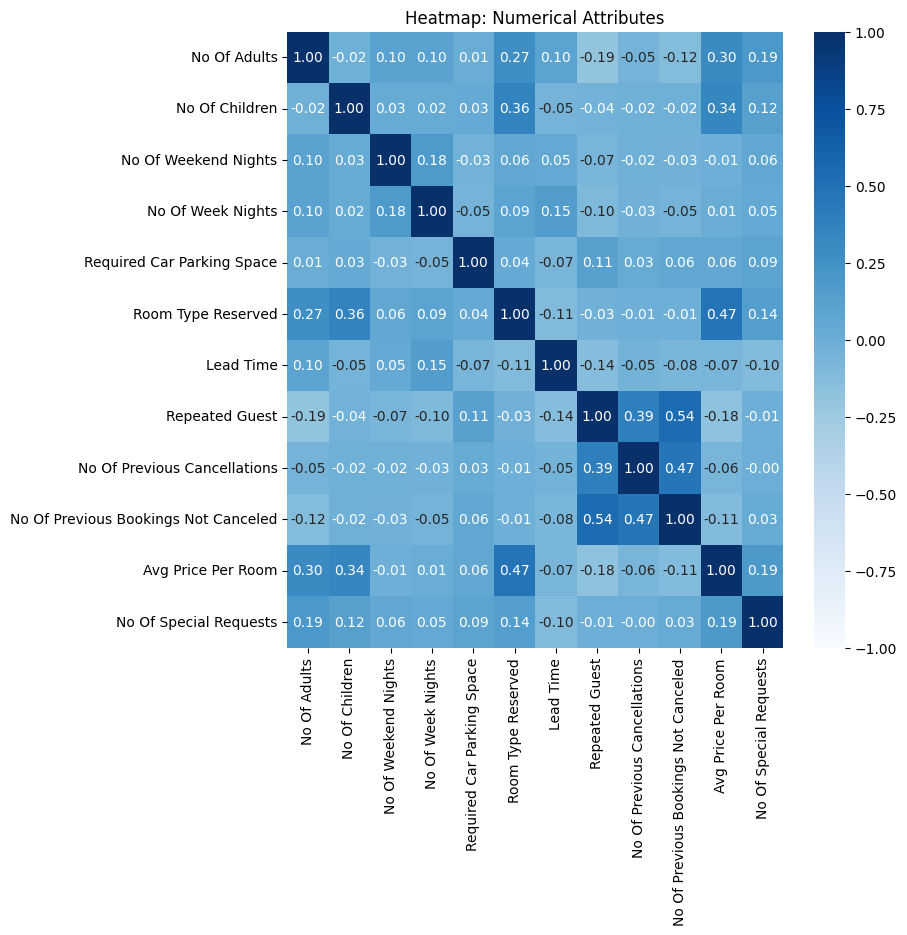

In [55]:
# Create a heatmap of the correlation of the numerical attributes
heatmap_plt(df_Inn_Copy)

#### Observations:
* There is a moderate correlation between no_of_previous_bookings_not_canceled and repeated_guest

In [56]:
# Change the Booking Status to be a 1 (Canceled) or a 0 (Not Canceled) for model building
df_Inn_Copy['booking_status'] = df_Inn_Copy['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [57]:
# Define the X independent variables for the model
X = df_Inn_Copy.drop(['booking_status'], axis=1)

# Define the y predictor value
y = df_Inn_Copy['booking_status']

In [58]:
# Show the first 5 records of the X dataframe
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,1,224,10,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,1,5,11,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,1,1,2,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,1,211,5,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,1,48,4,Online,0,0,0,94.50,0


In [59]:
# Show the first 5 records of the y dataframe
y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [60]:
# Add a constant variable to the X dataframe
X = sm.add_constant(X)

In [61]:
# create dummy variables for each categorical attribute
X = pd.get_dummies(X, dtype=int, columns=X.select_dtypes(include=['object']).columns.tolist(),drop_first=True)

# Show the first five records of the X dataframe
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,repeated_guest,no_of_previous_cancellations,...,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,2,0,1,2,0,1,224,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,2,0,2,3,0,1,5,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1,0,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,2,0,0,2,0,1,211,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1.0,2,0,1,1,0,1,48,0,0,...,1,0,0,0,0,0,0,0,0,1


In [62]:
# Determine the proportion of canceled(1) and non-canceled(0) bookings
y.value_counts(1)

booking_status
0    0.671571
1    0.328429
Name: proportion, dtype: float64

In [63]:
# Build the training and test data. Training data will have 80%  of X data and test data will have 20% of X data
# Use the random_state seed value of 1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [64]:
# Print the number of records in the training and test data sets
print('Number of rows in training data: {}'.format(x_train.shape[0]))
print('Number of rows in the test data: {}'.format(x_test.shape[0]))

Number of rows in training data: 28928
Number of rows in the test data: 7232


## Building a Logistic Regression model

In [65]:
# Import warnings to ignore the convergence warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [66]:
# Fit logistic regression model
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

# Print the summary report of the logit model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28928
Model:                          Logit   Df Residuals:                    28897
Method:                           MLE   Df Model:                           30
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3466
Time:                        18:04:31   Log-Likelihood:                -11966.
converged:                      False   LL-Null:                       -18313.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.8538      0.333    -14.578      0.000      -5.506      -4.201
no_of_adults                             0.1379      

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [67]:
# Define a function to calculate the VIF values for the predictors
def checking_vif(predictors):
    """
    predictors: independent X training data
    """
    
    # Create a dataframe to store the VIF results
    df_vif = pd.DataFrame()
    
    # Add a column called feature that contains the column predictor names
    df_vif['feature'] = predictors.columns

    # Calculate VIF for each feature
    df_vif['VIF'] = [variance_inflation_factor(predictors.values, i)
                     for i in range(len(df_vif['feature']))
    ]
    
    # Return the df_VIF dataframe results
    return df_vif

In [68]:
# Call the checking_vif function
checking_vif(x_train)

,feature,VIF
0,const,337.431427
1,no_of_adults,1.361139
2,no_of_children,1.306022
3,no_of_weekend_nights,1.075726
4,no_of_week_nights,1.105273
5,required_car_parking_space,1.038933
6,room_type_reserved,1.627964
7,lead_time,1.321932
8,repeated_guest,1.753951
9,no_of_previous_cancellations,1.372400


### Removing Multicollinearity Features

In [69]:
# Define a function to compute different metrics used in checking performance of a classification model
def model_performance_classification(model, predictors, target, threshold=None):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    if threshold == None:
        pred_temp = model.predict(predictors)
    else:
        # Checking which probabilities are greater than the threshold
        pred_temp = model.predict(predictors) > threshold
    
    # Rounding off the above values
    pred = np.round(pred_temp)

    # Calculated the accuracy score
    acc = accuracy_score(target, pred)
    
    # Calculate the recall score
    recall = recall_score(target, pred)
    
    # Calculate the precision score
    precision = precision_score(target, pred)
    
    # Calculate the F1 score
    f1 = f1_score(target, pred)

    # Create a dataframe of the metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    # Return the metric dataframe
    return df_perf

In [70]:
# Create a function to determine the effects of removing a high VIF column from the model
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Function to calculate the effect of removing a high VIF column
    
    predictors: independent variables
    target: dependent variable
    high_vif_columns: list of the high vif columns
    
    """
    

    # Create lists for f1    
    f1=[]
    
    # Cycle through each VIF columns
    for cols in high_vif_columns:
        
        # Create a new training data based on the removal of the columns(cols)
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
        
        # Create a new logit model based on the new training data
        lg2 = sm.Logit(target, train.astype(float)).fit(disp=False, method='bfgs')
        
        # Call model_performance_classification_statsmodels function to retrieve performace statistics on model
        df_perf = model_performance_classification(lg2, train, target)
        
        # Assign the F1 value to the F1 list
        f1.append(df_perf.iloc[0,3])
    
    # Create a temporary dataframe to store the results of analyzing the effect of dropping each VIF column
    # Sort by the F1 value
    temp = pd.DataFrame({'col': high_vif_columns,
                         'F1': f1}                     
                       ).sort_values(by = 'F1',ascending=False)
    
    # Reset the index of the temporary dataframe
    temp.reset_index(drop=True, inplace=True)
    
    # Return the temp dataframe
    return temp

In [71]:
# Checking model performance on the training set (seen 80% data)
log_reg_model_train_perf_default = model_performance_classification(lg, x_train, y_train)

print("Training performance:")
log_reg_model_train_perf_default

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805379,0.640669,0.733109,0.683779


In [72]:
# Create a list of the columns in the X dataframe
Xcols = X.columns.intersection(X.columns)

# Make copies of the X training and test dataframes
x_train2 = x_train.copy()
x_test2 = x_test.copy()

# Call the function checking_vif using the x train input data
vif = checking_vif(x_train2)
    
# Filter the vif dataframe for records with a VIF value greater than 5
vif = vif[(vif['VIF']>5) & (vif['feature'] != 'const')]
    
# Create a list of the VIF feature names
vifcols = vif['feature'].values

while not vif.empty:
    # Call the treating_multicollinearity function    
    res = treating_multicollinearity(x_train2, y_train, vifcols)
    
    # Find the column to drop with the minimum adjust r-squared value
    drop_column = res['col'][res['F1'] == \
                  res['F1'].max()].tolist()
    
    # Drop the column from the X training dataframe
    x_train2 = x_train2.drop(drop_column, axis=1)
    print('{} dropped from x_train2'.format(*drop_column))
    
    # Drop the column from the X testing dataframe
    x_test2 = x_test2.drop(drop_column, axis=1)
    print('{} dropped from x_test2'.format(*drop_column))
    
    # Call the function checking_vif using the x train input data
    vif = checking_vif(x_train2)
    
    # Filter the vif dataframe for records with a VIF value greater than 5
    vif = vif[(vif['VIF']>5) & (vif['feature'] != 'const')]
    
    # Create a list of the VIF feature names
    vifcols = vif['feature'].values

arrival_month_10 dropped from x_train2
arrival_month_10 dropped from x_test2
market_segment_type_Offline dropped from x_train2
market_segment_type_Offline dropped from x_test2


In [73]:
# Check VIF now
vif = checking_vif(x_train2)
vif

,feature,VIF
0,const,33.398311
1,no_of_adults,1.344871
2,no_of_children,1.300362
3,no_of_weekend_nights,1.074549
4,no_of_week_nights,1.103901
5,required_car_parking_space,1.037523
6,room_type_reserved,1.619903
7,lead_time,1.286362
8,repeated_guest,1.751369
9,no_of_previous_cancellations,1.358731


In [74]:
# Fit logistic regression model
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit(disp=False)

# Print the summary report of the logit model
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28928
Model:                          Logit   Df Residuals:                    28899
Method:                           MLE   Df Model:                           28
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3409
Time:                        18:04:41   Log-Likelihood:                -12070.
converged:                      False   LL-Null:                       -18313.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.2957      0.107    -49.348      0.000      -5.506      -5.085
no_of_adults                             0.1050      

### Removing High P-value Features

In [75]:
# Remove predictor where the max p-value is greater than 0.05
# Rerun the training process each time a column is removed and then recheck

# Create a copy of the modified X training data
predictors = x_train2.copy()

# Create a list of the column names
cols = predictors.columns.tolist()

# Cycle through the column list until there are no more columns in the list
while len(cols) > 0:
    
    # Create an X training dataframe that contains only the columns in the list
    x_train_upd = predictors[cols]
    
    # fitting the model
    ptest_model = sm.Logit(y_train, x_train_upd).fit(disp=False)
    
    # Retrieve the max p-value from the model
    p_values = ptest_model.pvalues
    max_p_value = max(p_values)
    
    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    # If the p-value is greater than 0.05, add the column to the list be dropped
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        print('{} to be dropped with p_value of {}'.format(feature_with_p_max,round(max_p_value,4)))
    else:
        break

# List of columns to be dropped from the X training and X test data        
features_to_drop = cols

market_segment_type_Complementary to be dropped with p_value of 1.0
arrival_month_7 to be dropped with p_value of 0.8985
no_of_children to be dropped with p_value of 0.8121
arrival_month_5 to be dropped with p_value of 0.5472
arrival_month_8 to be dropped with p_value of 0.5438
no_of_previous_bookings_not_canceled to be dropped with p_value of 0.2854
type_of_meal_plan_Meal Plan 3 to be dropped with p_value of 0.2559
type_of_meal_plan_Meal Plan 2 to be dropped with p_value of 0.2548


In [76]:
# Create a new X training dataframe without the features to drop because of high p-value
x_train3 = x_train2[features_to_drop]

# Create a new X test dataframe without the features to drop because of high p-value
x_test3 = x_test2[features_to_drop]

In [77]:
# Fit logistic regression model
logit3 = sm.Logit(y_train, x_train3.astype(float))
lg3 = logit3.fit(disp=False)

# Print the summary report of the logit model
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28928
Model:                          Logit   Df Residuals:                    28907
Method:                           MLE   Df Model:                           20
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3405
Time:                        18:04:42   Log-Likelihood:                -12077.
converged:                       True   LL-Null:                       -18313.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.3211      0.106    -50.362      0.000      -5.528      -5.114
no_of_adults                       0.1044      0.035      3.004      0.

#### Observations:
* Coefficients of no_of_adults, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Not_Selected, arrival months (2,3,4,6,11), market_segment_type_Corporate and market_segment_Online are positive. An increase in these attributes will lead to an increased chance of a booking becoming canceled

* Coefficients of required_car_parking_space, room_type_reserved, repeated_guest, no_of_special_requests and arrival months (9, 12) are negative. A decrease in the these attributes will lead to a decreased chance of a booking cancellation

In [78]:
# Converting coefficients to odds
odds = np.exp(lg3.params)

# Finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train3.columns).T

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,arrival_month_11,arrival_month_12,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_6,arrival_month_9,market_segment_type_Corporate,market_segment_type_Online
Odds,0.004887,1.110085,1.169915,1.062939,0.194760,0.890660,1.016937,0.066991,1.256300,1.021309,0.224586,1.406447,1.745552,0.264405,2.689376,1.831907,1.413618,1.167613,0.837977,2.504648,5.88748
Change_odd%,-99.511259,11.008503,16.991504,6.293906,-80.524002,-10.933967,1.693743,-93.300912,25.630043,2.130885,-77.541364,40.644735,74.555182,-73.559549,168.937580,83.190676,41.361806,16.761286,-16.202293,150.464816,488.74800


### Coefficient interpretations

* `Number of Adults`: Holding all other features constant a unit change in the number of adults will increase the odds of a booking cancelling by 1.11 times or a 11.0% increase in odds.
* `Number of Weekend Nights`: Holding all other features constant a unit change in the number of weekend nights will increase the odds of a booking cancelling by 1.17 times or a 17.0% increase in odds.
* `Number of Week Nights`: Holding all other features constant a unit change in the number of week nights will increase the odds of a booking cancelling by 1.06 times or a 6.29% increase in odds.
* `Parking Space Required`: The odds of a booking cancelling decreases by 0.19 times or 80.52% if a parking space is required.
* `Room Type`: Holding all other features constant a one room type increase will decrease the odds of a booking cancelling by 0.89 times or a 10.9% decrease in odds.
* `Lead Time`: Holding all other features constant a unit change in the lead time will increase the odds of a booking cancelling by 1.01 times or a 1.69% increase in odds.
* `Repeat Guest`: The odds of a booking cancelling decreases by 0.07 times or 93.3% if a customer is a repeat guest.
* `Number of Previous Cancellations`: Holding all other features constant a unit change in the number of previous cancellations a customer had will increase the odds of a booking cancelling by 1.26 times or a 25.6% increase in odds.
* `Average Price Per Room`: Holding all other features constant a unit change in the average price per room will increase the odds of a booking cancelling by 1.02 times or a 2.13% increase in odds.
* `Number of Special Requests`: Holding all other features constant a unit change in special requests will decrease the odds of a booking cancelling by 0.22 times or a 77.5% decrease in odds.
* `Meal Plan Type`: The odds of a booking cancelling increases by 1.40 times or 40.6% if a meal plan is not selected.
* `Arrival Month - February`: The odds of a booking cancelling increases by 2.69 times or 168.9% if the arrival month is February
* `Arrival Month - March`: The odds of a booking cancelling increases by 1.83 times or 83.2% if the arrival month is March
* `Arrival Month - April`: The odds of a booking cancelling increases by 1.41 times or 41.4% if the arrival month is April
* `Arrival Month - June`: The odds of a booking cancelling increases by 1.17 times or 16.8% if the arrival month is June
* `Arrival Month - September`: The odds of a booking cancelling decreases by 0.83 times or 16.2% if the arrival month is September
* `Arrival Month - November`: The odds of a booking cancelling increases by 1.75 times or 74.6% if the arrival month is November
* `Arrival Month - December`: The odds of a booking cancelling decreases by 0.26 times or 73.6% if the arrival month is December
* `Market Segment - Corporate`: The odds of a booking cancelling increases by 2.5 times or 150.5% if the market segment type is corporate
* `Market Segment - Online`: The odds of a booking cancelling increases by 5.89 times or 488.7% if the market segment type is offline

## Model performance evaluation

In [79]:
# Define function to create a confusion matrix of the classification model

def create_confusion_matrix(model, predictors, target, rpt_type, threshold=None):
    """
    To plot the confusion_matrix with percentages

    model: classifier model to predict values
    predictors: independent X variables
    target: dependent Y variable
    threshold: threshold for classifying the observation as class 1
    """
    
    if threshold == None:
            y_pred = model.predict(predictors)
    else:
        # Predict the y labels (1 or 0) based on the predictor model given a threshold label
        y_pred = model.predict(predictors) > threshold
    
    # Build a confusion matrix based on the predicted y values and the actual y values
    cm = confusion_matrix(target, y_pred)
    
    # Create a dataframe with the confusion matrix that includes labels
    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - No','Actual - Yes']],
                         columns = [i for i in ['Predicted - No','Predicted - Yes']])
    
    # Retrieve the cell percentage and total values of the matrix
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
                          for item in cm.flatten()]
                        ).reshape(2, 2)

    # Create a heatmap of the matrix including the cell total and percentage labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.title('Confusion Matrix: {}'.format(rpt_type))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Training set performance**

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80607,0.639722,0.73539,0.684228


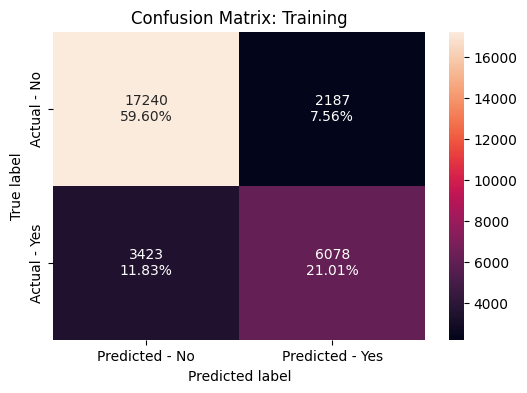

In [80]:
# Create confusion matrix - training, 0.5, 80%
create_confusion_matrix(lg3, x_train3, y_train, 'Training', threshold=0.5)

# Checking model performance on the training set (seen 80% data)
log_reg_model_train_perf_default = model_performance_classification(lg3, x_train3, y_train)

print("Training performance:")
log_reg_model_train_perf_default

**Testing set performance**

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.797981,0.631158,0.71929,0.672348


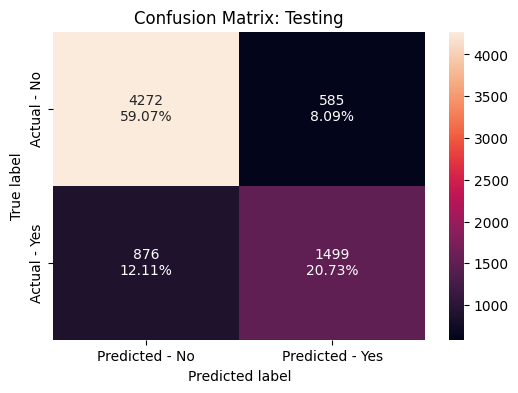

In [81]:
# Create confusion matrix - testing, 0.5, 20%
create_confusion_matrix(lg3, x_test3, y_test, 'Testing', threshold=0.5)

# Checking model performance on the testing set (seen 20% data)
log_reg_model_test_perf_default = model_performance_classification(lg3, x_test3, y_test)
                                                                                
print("Testing performance:")
log_reg_model_test_perf_default    

## Model Performance Improvement

### ROC Curve and ROC-AUC

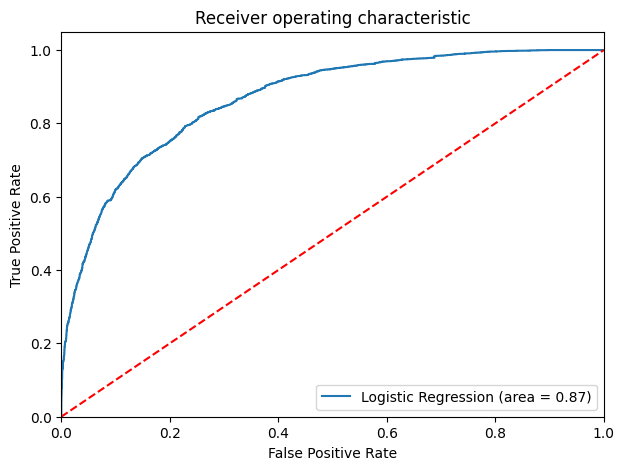

In [82]:
# Create ROC curve
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(x_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [83]:
# Determine optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.28230173759818017


**Training Set Performance: AUC-ROC Threshold**

Training performance:


,Accuracy,Recall,Precision,F1
0,0.770119,0.817598,0.612377,0.700261


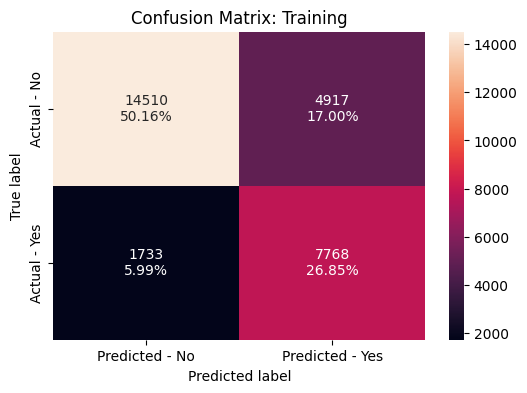

In [84]:
# Create confusion matrix - training, 0.28, 80%
create_confusion_matrix(lg3, x_train3, y_train, 'Training', threshold=optimal_threshold_auc_roc)

# Checking model performance on the training set (seen 80% data)
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification(
    lg3, x_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

**Testing Set Performance: AUC-ROC Threshold**

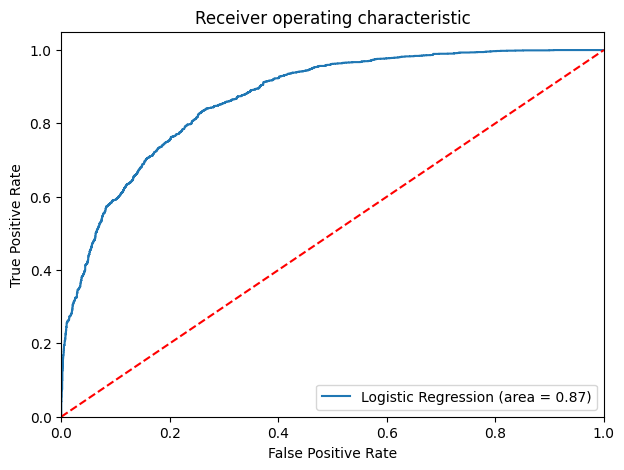

In [85]:
# Create ROC curve
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(x_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(x_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Test performance:


,Accuracy,Recall,Precision,F1
0,0.772677,0.823579,0.614901,0.704104


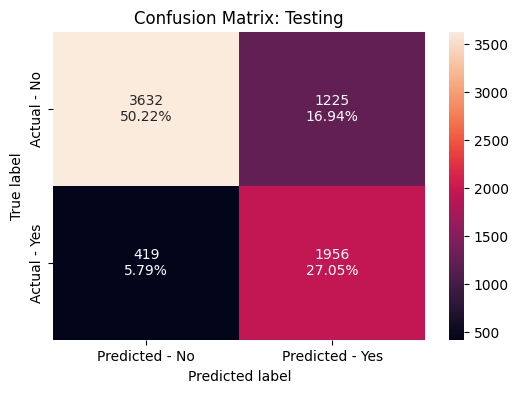

In [86]:
# Create confusion matrix - testing, 0.28, 20%
create_confusion_matrix(lg3, x_test3, y_test, 'Testing', threshold=optimal_threshold_auc_roc)

# Checking model performance on the testing set (seen 20% data)
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification(
    lg3, x_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

### Precision-Recall Curve

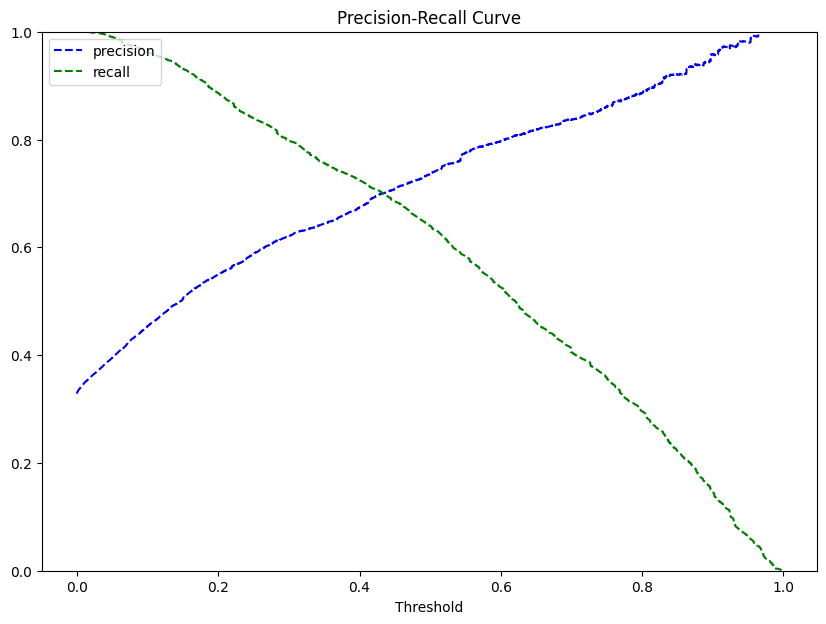

 The optimal threshold value to get a balanced recall and precision is 0.4336211410110805


In [87]:
# Create a precision-recall curve plot
y_scores = lg3.predict(x_train3)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plt.figure(figsize=(10, 7))
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision-Recall Curve")
plt.ylim([0, 1])
plt.show()

# Determine the optimal threshold value based on precision and recall
for i in range(len(precisions)):
    if precisions[i]>=recalls[i]:
        break
optimal_threshold_curve = thresholds[i]          
print(' The optimal threshold value to get a balanced recall and precision is {}'.format(thresholds[i]))

**Training Set Performance: Precision-Recall Threshold**

Training performance:


,Accuracy,Recall,Precision,F1
0,0.803028,0.700032,0.700179,0.700105


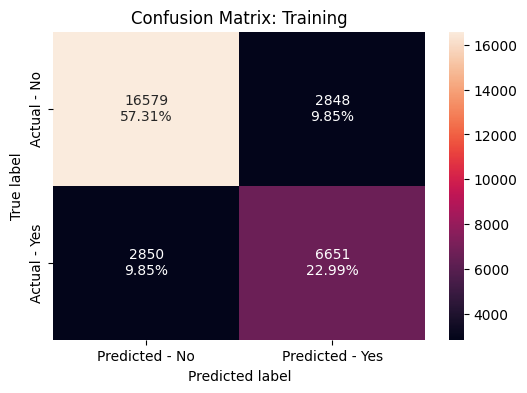

In [88]:
# Create confusion matrix - training, 0.43, 80%
create_confusion_matrix(lg3, x_train3, y_train, 'Training', threshold=optimal_threshold_curve)

# Checking model performance on the training set (seen 80% data)
log_reg_model_train_perf_threshold_curve = model_performance_classification(
    lg3, x_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

**Testing Set Performance: Precision-Recall Threshold**

Test performance:


,Accuracy,Recall,Precision,F1
0,0.797013,0.696421,0.68888,0.69263


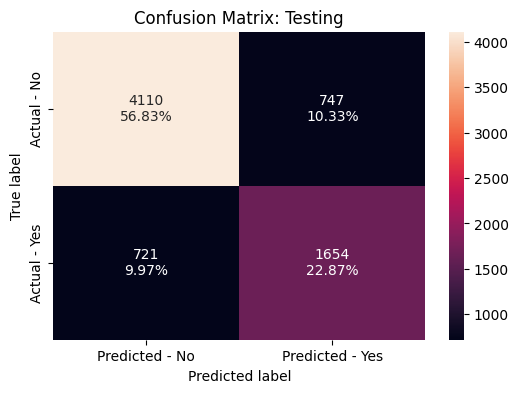

In [89]:
# Create confusion matrix - training, 0.43, 20%
create_confusion_matrix(lg3, x_test3, y_test, 'Testing', threshold=optimal_threshold_curve)

# Checking model performance on the testing set (seen 20% data)
log_reg_model_test_perf_threshold_curve = model_performance_classification(
    lg3, x_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

## Final Model Summary

In [90]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf_default.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.28 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.28 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.806070,0.770119,0.803028
Recall,0.639722,0.817598,0.700032
Precision,0.735390,0.612377,0.700179
F1,0.684228,0.700261,0.700105


In [91]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf_default.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.28 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.28 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.797981,0.772677,0.797013
Recall,0.631158,0.823579,0.696421
Precision,0.719290,0.614901,0.688880
F1,0.672348,0.704104,0.692630


#### Observations: 
* All the models are giving a generalized performance on training and test set
* The highest F1 score is 70.4% with a 82% recall testing set
* Using the model with default 0.50 threshold, the model will give a low recall but good precision scores. This model will help the hotel save resources but will increase the loss of revenue from cancellations.
* Using the model with 0.28 threshold the model will give a high recall but low precision scores. This model will help the hotel identify potential cancellations effectively but at a higher cost of investigation potential cancellations.
* Using the model with 0.43 threshold the model will give a balance recall and precision score. This model will help the hotel to maintain a balance in identifying potential cancellations and the loss of revenue to actual cancellations.
* Using the F1 score for evaluation purposes, the logistic regression model with a 0.28 threshold is optimum

## Building a Decision Tree model

In [92]:
# Create a copy of the df_Inn_Copy dataset
df_Inn_DT  = df_Inn_Copy.copy()

In [93]:
# Change the object datatypes to category

# Loop through all columns in the dataframe
for feature in df_Inn_DT.columns: 
    if df_Inn_DT[feature].dtype == 'object':
        df_Inn_DT[feature] = pd.Categorical(df_Inn_DT[feature])
df_Inn_DT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36160 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36160 non-null  int64   
 1   no_of_children                        36160 non-null  int64   
 2   no_of_weekend_nights                  36160 non-null  int64   
 3   no_of_week_nights                     36160 non-null  int64   
 4   type_of_meal_plan                     36160 non-null  category
 5   required_car_parking_space            36160 non-null  int64   
 6   room_type_reserved                    36160 non-null  int64   
 7   lead_time                             36160 non-null  int64   
 8   arrival_month                         36160 non-null  category
 9   market_segment_type                   36160 non-null  category
 10  repeated_guest                        36160 non-null  int64   
 11  no_of_p

In [94]:
# Replace the meal plan with a number value
replaceStruct = {'type_of_meal_plan': {'Meal Plan 1':1, 'Meal Plan 2':2, 'Meal Plan 3':3, 'Not Selected':-1}}

# Set the market_segment_type and arrival_month as oneHot columns. These will get dummy columns
oneHotCols=['market_segment_type','arrival_month']

# Replace the meal plan string values with numbers
df_Inn_DT=df_Inn_DT.replace(replaceStruct)

# Create dummy columns
df_Inn_DT=pd.get_dummies(df_Inn_DT,columns=oneHotCols)
df_Inn_DT.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,arrival_month_1,arrival_month_10,arrival_month_11,arrival_month_12,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9
0,2,0,1,2,1,0,1,224,0,0,0,65.00,0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1,2,0,2,3,-1,0,1,5,0,0,0,106.68,1,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
2,1,0,2,1,1,0,1,1,0,0,0,60.00,0,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
3,2,0,0,2,1,0,1,211,0,0,0,100.00,0,1,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,2,0,1,1,-1,0,1,48,0,0,0,94.50,0,1,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False


In [95]:
# Define the X independent variables for the model
X = df_Inn_DT.drop('booking_status' , axis=1)

# Define the y predictor value
y = df_Inn_DT.pop('booking_status')

# Build the training and test data. Training data will have 70%  of X data and test data will have 30% of X data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

# Print the number of records in the training and test data sets
print('Number of rows in training data: {}'.format(X_train.shape[0]))
print('Number of rows in the test data: {}'.format(X_test.shape[0]))

Number of rows in training data: 25312
Number of rows in the test data: 10848


In [96]:
# Show the first 5 records of the X dataframe
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,arrival_month_1,arrival_month_10,arrival_month_11,arrival_month_12,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9
29262,1,0,0,3,1,0,1,31,0,0,0,73.90,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
4990,2,0,0,3,1,0,6,3,0,0,0,175.56,1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
21122,2,0,1,2,1,0,2,121,0,0,0,97.54,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
17028,2,0,0,1,1,0,1,24,0,0,0,118.15,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
13868,2,0,1,4,1,0,1,114,0,0,0,129.60,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


### Decision Tree Without Class Weight

In [97]:
# Create decision tree
dTree0 = DecisionTreeClassifier(random_state=1)
dTree0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [98]:
# Check model performance on the training set
decision_tree_performance_train_without_weight = model_performance_classification(dTree0, X_train, y_train)
print("Training performance:")
decision_tree_performance_train_without_weight

Training performance:


,Accuracy,Recall,Precision,F1
0,0.993837,0.984843,0.996349,0.990563


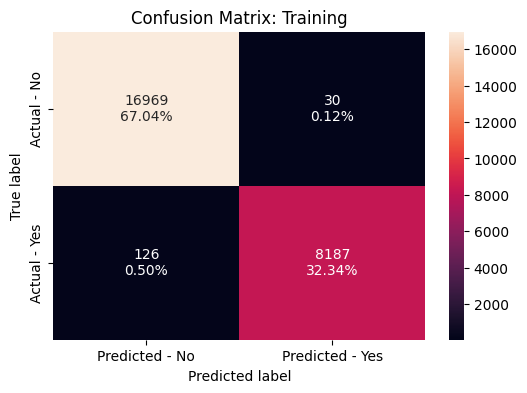

In [99]:
# Create a confusion matrix on the training set
create_confusion_matrix(dTree0,X_train, y_train, 'Training')

In [100]:
# Check model performance on the testing set
decision_tree_performance_test_without_weight = model_performance_classification(dTree0, X_test, y_test)
print("Testing performance:")
decision_tree_performance_test_without_weight

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.866427,0.810272,0.788798,0.799391


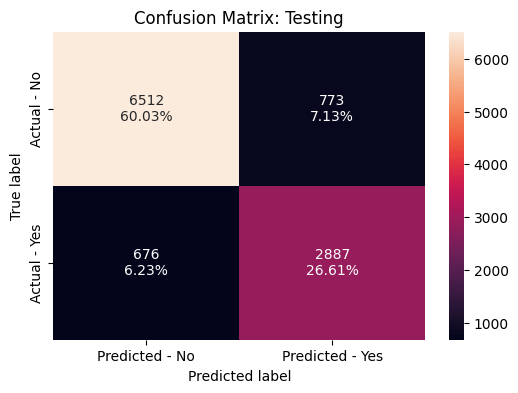

In [101]:
# Create a confusion matrix on the testing set
create_confusion_matrix(dTree0, X_test, y_test, 'Testing')

#### Observations:
 * While the model has a high accuracy rate of 99%, the F1 score is 80% indicating a high level of noise fit within the model

### Decision Tree With Class Weight

In [102]:
# Create a weighted decision tree
dTree1 = DecisionTreeClassifier(criterion = 'gini', class_weight='balanced', random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [103]:
# Check model performance on the training set
decision_tree_performance_train_with_weight = model_performance_classification(dTree1, X_train, y_train)
print("Training performance:")
decision_tree_performance_train_with_weight

Training performance:


,Accuracy,Recall,Precision,F1
0,0.992889,0.994948,0.983589,0.989236


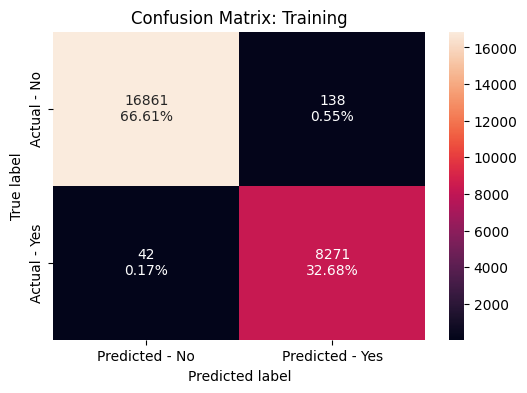

In [104]:
# Create a confusion matrix on the training set
create_confusion_matrix(dTree1,X_train, y_train, 'Training')

In [105]:
# Check model performance on the testing set
decision_tree_performance_test_with_weight = model_performance_classification(dTree1, X_test, y_test)
print("Testing performance:")
decision_tree_performance_test_with_weight

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.863108,0.808027,0.782337,0.794974


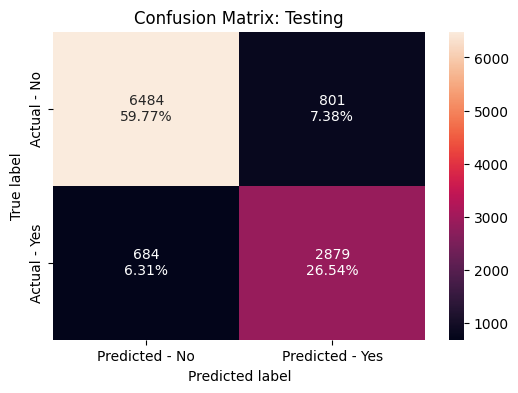

In [106]:
# Create a confusion matrix on the testing set
create_confusion_matrix(dTree1,X_test, y_test, 'Testing')

In [107]:
# Text report showing the rules of a decision tree
feature_names = list(X_train.columns)
print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [50.63, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 80.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  80.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |

In [108]:
# Create the importance list of features in the tree building
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.384622
avg_price_per_room                    0.153636
market_segment_type_Online            0.100796
no_of_special_requests                0.087377
no_of_week_nights                     0.051612
no_of_weekend_nights                  0.045112
no_of_adults                          0.029175
arrival_month_12                      0.021267
room_type_reserved                    0.014702
type_of_meal_plan                     0.013927
arrival_month_4                       0.009163
arrival_month_10                      0.008755
required_car_parking_space            0.008436
arrival_month_9                       0.008091
arrival_month_11                      0.007458
arrival_month_3                       0.007283
arrival_month_2                       0.006982
arrival_month_7                       0.006655
arrival_month_8                       0.006398
arrival_month_5                       0.005895
arrival_month

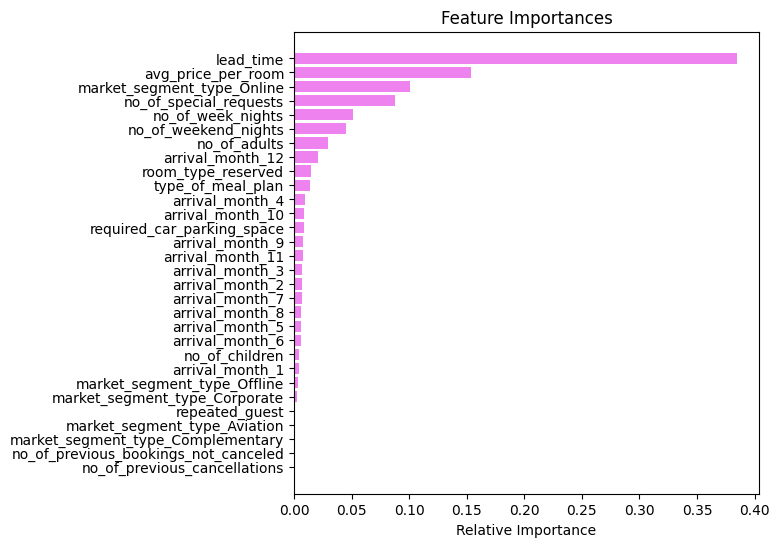

In [109]:
# PLot the Gini importance features
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
 * The weighted model performs better than the prior model. The weighted model has an F1 score of 79.5%. This model performs better than the logistic regression model which had an F1 score of 70.4%

### Pre-pruning GridSearchCV

In [110]:
# Import GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [111]:
# Build the decision tree model
estimator = DecisionTreeClassifier(random_state=1)

# Add grid parameters
parameters = {'max_depth': np.arange(10,15), # how deep the tree can go
              'criterion': ['gini'], 
              'min_impurity_decrease': [0.0002, 0.0003, 0.0004, 0.0005],          
              'class_weight': [None, 'balanced'],
              'min_samples_split': [25,50,75,100], # how many samples must exist before a split can happen
              'min_samples_leaf': [5,10,15,20] # how many samples must be in a leaf            
             }

# Use F1 scoring to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_impurity_decrease=0.0003, min_samples_leaf=5,
                       min_samples_split=25, random_state=1)

In [112]:
# Check model performance on the training set
decision_tree_performance_train_preprune_gridsearch = model_performance_classification(estimator, X_train, y_train)
print('Training performance:')
decision_tree_performance_train_preprune_gridsearch

Training performance:


,Accuracy,Recall,Precision,F1
0,0.86698,0.809575,0.790463,0.799905


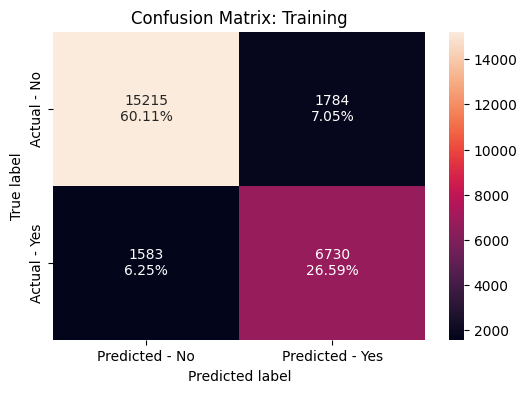

In [113]:
# Create a confusion matrix on the training set
create_confusion_matrix(estimator,X_train, y_train, 'Training')

In [114]:
# Check model performance on the testing set
decision_tree_performance_test_preprune_gridsearch = model_performance_classification(estimator, X_test, y_test)
print('Testing performance:')
decision_tree_performance_test_preprune_gridsearch

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.868732,0.809992,0.794385,0.802112


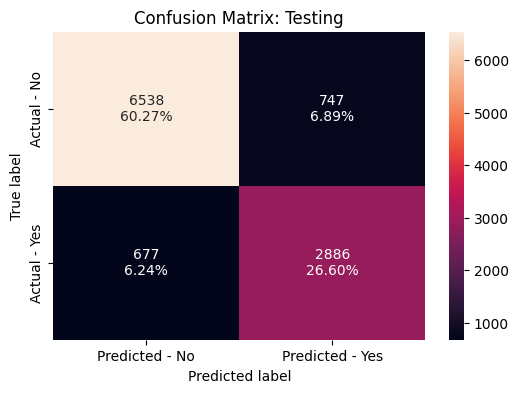

In [115]:
# Create a confusion matrix on the testing set
create_confusion_matrix(estimator,X_test, y_test, 'Testing')

In [116]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,feature_names=feature_names))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  88.50
|   |   |   |   |   |   |   |   |--- lead_time <= 8.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- lead_time >  8.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |  

In [117]:
# Create the importance list of features in the tree building
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.445672
market_segment_type_Online            0.169536
no_of_special_requests                0.144717
avg_price_per_room                    0.097338
no_of_weekend_nights                  0.031618
arrival_month_12                      0.028185
no_of_adults                          0.023969
required_car_parking_space            0.012014
no_of_week_nights                     0.011251
arrival_month_2                       0.007761
arrival_month_1                       0.005622
market_segment_type_Offline           0.004722
type_of_meal_plan                     0.004140
arrival_month_4                       0.004089
arrival_month_10                      0.003238
arrival_month_6                       0.001730
arrival_month_11                      0.001569
arrival_month_9                       0.001559
arrival_month_3                       0.001270
no_of_children                        0.000000
market_segmen

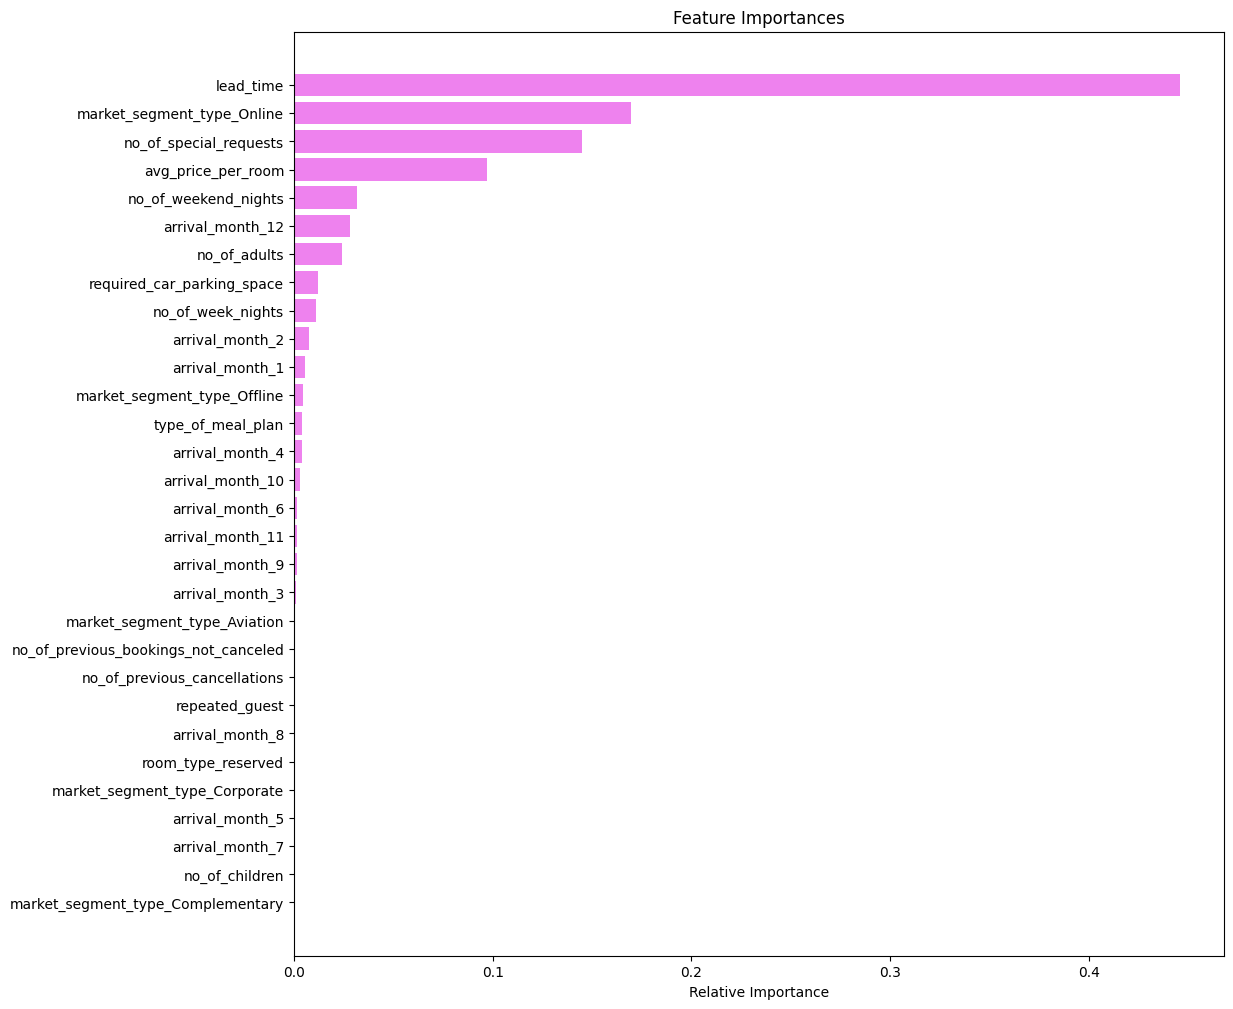

In [118]:
# Plot the Gini importance features
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
* The pre-pruning model using hyperparameters was slightly better than the weighted model. The F1 score of the pre-pruning model is 80.2% with a recall of 79.5%

### Post-pruning Cost Complexity

#### Total impurity of leaves vs effective alphas of pruned tree

In [119]:
#Create the initial classifier for all nodes
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Store the cost complexiry pruning alphas and impurity values from the classifier
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

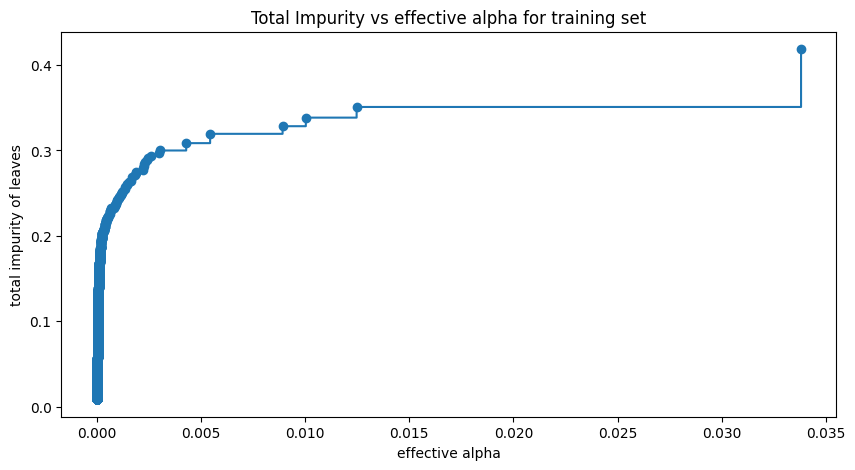

In [120]:
# Plot the ccp alphas against the impurity values
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [121]:
# Using the ccp alphas values build a decision tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08156944049310927


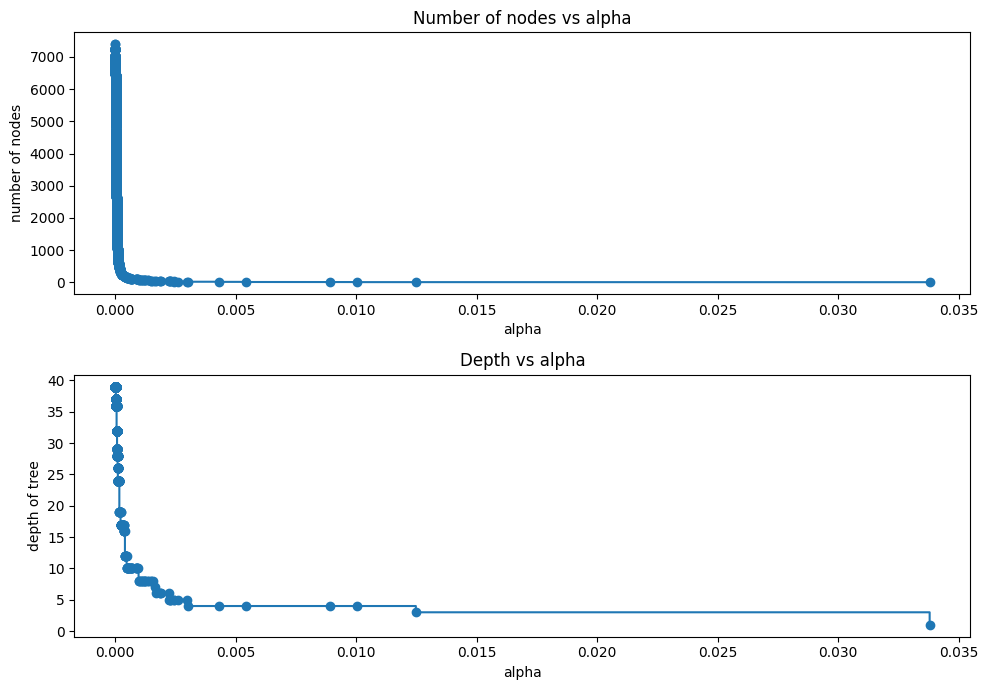

In [122]:
# PLot the number of nodes used and the depth of the tree against the alpha number
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))

# Using the new clf decision tree, plot the number of node used vs alpha number
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# Using the new clf decision tree, plot the depth of the tree vs alpha number
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [123]:
# Build the training F1 metric set
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [124]:
# Build the testing f1 metric set
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

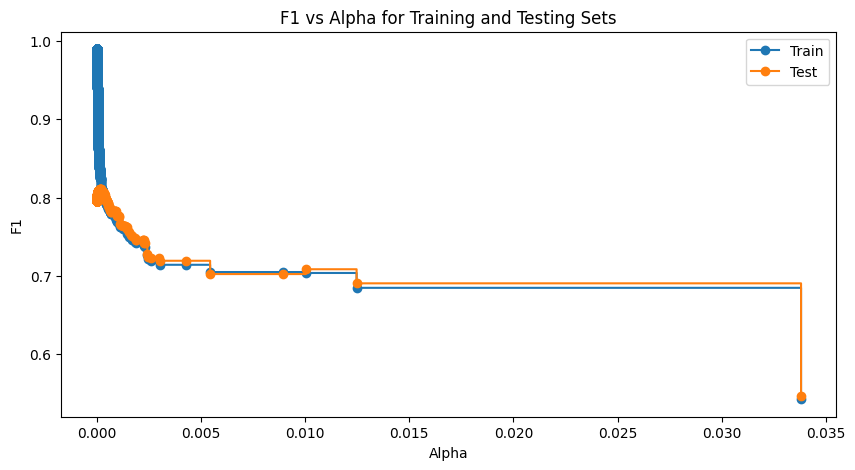

In [125]:
# Plot the F1 and alphas values for both the training and testing sets
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Alpha')
ax.set_ylabel('F1')
ax.set_title("F1 vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, f1_train, marker='o', label='Train',
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label='Test',
        drawstyle="steps-post")
ax.legend()
plt.show()

In [126]:
# Create the model that has the highest training and test F1 values
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00018446919664540486,
                       class_weight='balanced', random_state=1)


In [127]:
# Check model performance on the training set
decision_tree_performance_train_postprune_ccp = model_performance_classification(best_model, X_train, y_train)
print('Testing performance:')
decision_tree_performance_train_postprune_ccp

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.88223,0.863587,0.795369,0.828075


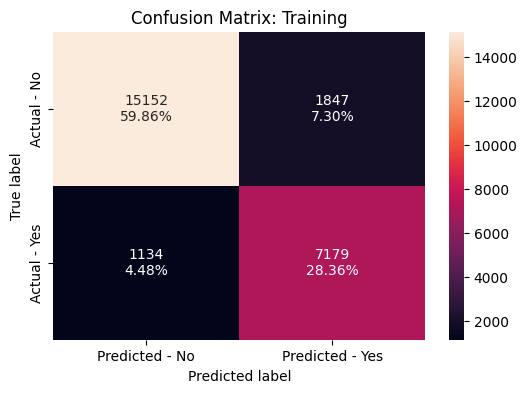

In [128]:
# Create a confusion matrix on the training set
create_confusion_matrix(best_model, X_train, y_train, 'Training')

In [129]:
# Check model performance on the training set
decision_tree_performance_test_postprune_ccp = model_performance_classification(best_model, X_test, y_test)
print('Testing performance:')
decision_tree_performance_test_postprune_ccp

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.871036,0.841706,0.782212,0.810869


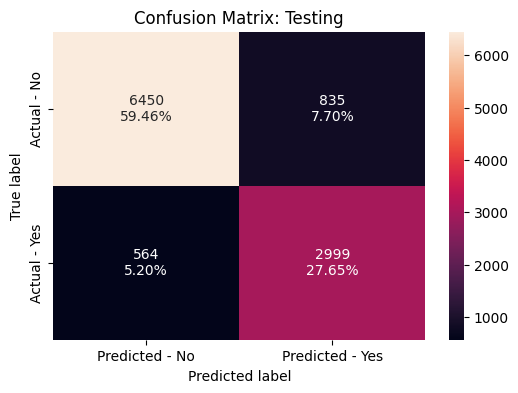

In [130]:
# Create a confusion matrix on the testing set
create_confusion_matrix(best_model, X_test, y_test, 'Testing')

In [131]:
# Text report showing the rules of a decision tree
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.50
|   |   |   |   |   |   |   |   |--- weights: [384.91, 53.29] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  88.50
|   |   |   |   |   |   |   |   |--- lead_time <= 8.50
|   |   |   |   |   |   |   |   |   |--- weights: [87.11, 18.27] class: 0
|   |   |   |   |   |   |   |   |--- lead_time >  8.50
|   |   |   |   |   |   |   |   |   |--- arrival_month_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [7.45, 16.75] class: 1
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |  

In [132]:
# Create the importance list of features in the tree building
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.426377
market_segment_type_Online            0.154596
no_of_special_requests                0.133446
avg_price_per_room                    0.107960
no_of_weekend_nights                  0.033104
arrival_month_12                      0.028629
no_of_adults                          0.027319
no_of_week_nights                     0.014367
required_car_parking_space            0.011844
type_of_meal_plan                     0.007676
arrival_month_2                       0.007637
arrival_month_1                       0.005924
arrival_month_4                       0.005099
arrival_month_9                       0.005055
arrival_month_10                      0.004963
arrival_month_11                      0.004535
market_segment_type_Offline           0.004306
arrival_month_6                       0.003584
arrival_month_7                       0.003155
arrival_month_3                       0.002914
arrival_month

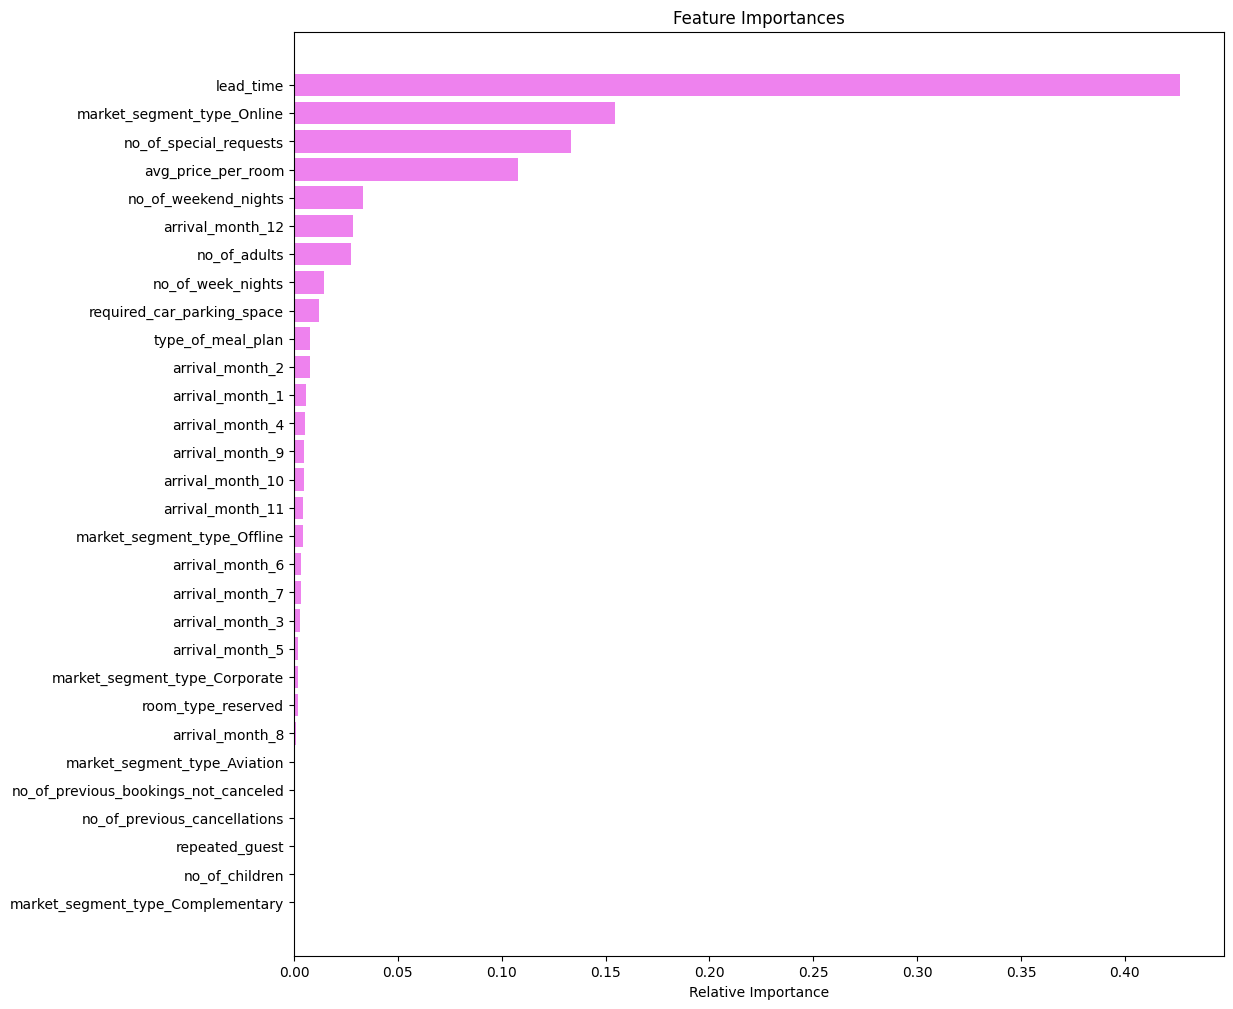

In [133]:
# Plot the Gini importance features
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
* The post-pruning model using hyperparameters was slightly better than the pre-pruning model. The F1 score of the post-pruning model is 81.1% with a recall of 84.2%

## Model Performance Comparison and Conclusions

In [134]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_performance_train_without_weight.T,
        decision_tree_performance_train_with_weight.T,
        decision_tree_performance_train_preprune_gridsearch.T,
        decision_tree_performance_train_postprune_ccp.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    'Decision Tree with class_weight',
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.993837,0.992889,0.866980,0.882230
Recall,0.984843,0.994948,0.809575,0.863587
Precision,0.996349,0.983589,0.790463,0.795369
F1,0.990563,0.989236,0.799905,0.828075


In [135]:
# Testing performance comparison
models_testing_comp_df = pd.concat(
    [
        decision_tree_performance_test_without_weight.T,
        decision_tree_performance_test_with_weight.T,
        decision_tree_performance_test_preprune_gridsearch.T,
        decision_tree_performance_test_postprune_ccp.T,
    ],
    axis=1,
)
models_testing_comp_df.columns = [
    "Decision Tree without class_weight",
    'Decision Tree with class_weight',
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_testing_comp_df

Testing performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.866427,0.863108,0.868732,0.871036
Recall,0.810272,0.808027,0.809992,0.841706
Precision,0.788798,0.782337,0.794385,0.782212
F1,0.799391,0.794974,0.802112,0.810869


In [136]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model',
                                          'Decision tree with restricted maximum depth',
                                          'Decision tree with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                 'Train F1':[0.99,0.99,0.80,0.83], 
                                 'Test F1':[0.80, 0.79,0.80,0.81]}) 
comparison_frame

,Model,Train F1,Test F1
0,Initial decision tree model,0.99,0.80
1,Decision tree with restricted maximum depth,0.99,0.79
2,Decision tree with hyperparameter tuning,0.80,0.80
3,Decision tree with post-pruning,0.83,0.81


#### Observations:
* Based on the information above, the post-pruning model performed the best according the the F1 score of 81%

## Actionable Insights and Recommendations

#### Predictive Modelling
 * Use the decision tree with pruning model to predict which customers may cancel. This model had the highest F1 score.
 * Predict a booking cancellation at the time of booking
 * When a booking is predicted to be cancelled:
     - Record a projected revenue number as a percentage of the full value
     - Record a projected occupancy rate as a percentage of a room to determine if more rooms could be sold 
     - Establish a workflow to better manage these bookings
 * Once a cancellation fee and refund policy is established, update the predictive model to account for the changes

#### Cancellations and refunds:
 * Lead time, online market, average price per room, number of special requests, and weekend nights are the most important variables in determining if a borrower cancels a booking. 
     - For each lead time day, the chance of cancellation increases by 1.69% 
     - Online bookings have a ~490% higher chance of cancelling 
     - For each Euro of the average price per room, the chance of cancellation increases by 2.13%
     - For each special request, the chance of cancellation decreases by 77.5%
     - For weekend night, the chance of cancellation increases by 17% 
 * Define when cancellation fees will begin and for what specific situations
 * Cancellation fees should be reflective of potential revenue loss
 * If deposits were accepted, define when a refund will be issued less any cancellation fees
 * Offer a non-refundable cancellation insurance policy for customers
 * If a customer does not show, decide if a partial or full rate should be charged
 
#### High season (August-October) :
 * Establish a no refund policy window that takes effect before the arrival date
 * Establish a partial refund policy window that takes effect before the no refund policy
 * As an exception for larger parties, establish a separate no refund policy that takes effect earlier
 * Use predicted cancellation information to better manage the room inventory during peak days
 * Establish a wait list for customers in case a booking cancels that is based on the decision tree model results
  
#### Low season (January-March):
 * Have a no refund or credit policy established for no shows
 * Establish a partial refund policy window that occurs for cancellations prior to the arrival date
 
#### Commissions
 * Institute policy of clawing back commissions from sales groups when bookings cancel

#### Marketing and Sales:
 * Examine the room rate policy to have lower rates Sunday through Thursday to sell more rooms 
 * 7.4% of bookings included a child. Investigate advertising and promotional offers for families
 * Large groups do not appear to book rooms under a single booking. Investigate offering a group discount for large parties
 * 2.6% of bookings are for repeat customers. Investigate if there is a reason why and work to obtain repeat customers
 * 5.6% of bookings were for the corporate segment. Work to promote corporate stays at the hotel as these would tend to create more repeat business throughout the year and sell more week nights
 * Room types 2,3,5,6,7 are not being booked. Investigate a way to promote these rooms or look to convert the rooms if possible into smaller rooms 

#### Human Resources:     
 * For all special requests, have human resources or customer care call the customer to verify the booking, current special requests, and any additional requests before beginning work on the requests  

#### Other recommendations:
 * Establish a maximum lead time allowed for bookings to reduce the potential for cancellations
 * Through email or messaging, remind customer of booking before any cancellation penalities occur
 * Breakout cancellations into no-show and cancellation buckets
 * Breakout bookings by commission applicable and non-commissioned 

